<img src='https://raw.githubusercontent.com/betelgeus/study/master/images/statistic_workflow.png'/>

**Оглавление**
- Исследовать взаимосвязь между двумя переменными
    - Обе переменные количественные
        - Коэффициент корреляции Пирсона
        - Коэффициент корреляции Спирмена
        - Линейная регрессия
    - Обе переменные номинативные
        - Хи-квадрат Пирсона
        - F-тест (критерий Фишера)
    - Одна номинативная, вторая количественная
        - T-критерий Стьюдента
        - One-Way ANOVA
        - U-критерий Манна-Уитни
        - Логистическая регрессия
- Исследовать взаимосвязь между множеством переменных
    - Зависимая переменная количественная
        - Линейная регрессия
        - Дисперсионный анализ
    - Зависимая переменная номинативная
        - Логистическая регрессия (см. логистическая регрессия в п. 'Одна номинативная, вторая количественная')

### Коэффициент корреляции Пирсона (Pearsons correlation coefficient)
**Используем для анализа влияние одной количественной переменной на другую**

Коэффициент измеряет линейную зависимость между двумя выборками. Он колеблется в пределах -1
и +1, где 0 означает отсутствие корреляции. Корреляции -1 или +1 подразумевают полную линейную зависимость. Положительные корреляции означают, что по мере увеличения x так же увеличивается у. Отрицательные корреляции подразумевают, что с увеличением x уменьшается y.

Метод также выполняет проверку гипотезы о том, что наблюдения в выборке нормально распределены и независимы друг от друга. Значение P-value показывает вероятность того, что будет обнаружена корреляция там, где ее на самом деле нет (совершена ошибка первого рода и отвергнута верная нулевая гипотеза).

**Требования к данным**
- Независимая переменная — это количественная непрерывная переменная
- Зависимая переменная — это количественная непрерывная переменная
- Линейное распределение и линейность связи между переменными
- Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной
- Независимые наблюдения в каждой из выборок
- Отсутствие выбросов
- Нормальность распределения. Перед анализом необходимо проверить распределение на нормальность (QQ plot)


### Постановка задачи
Найти зависимость уровня смертности от уровня бедности

In [151]:
# Задача: выяснить есть ли статистически значимая зависимость уровня смертности от уровня бедности и как велика эта зависимость.
# Переформулируем задачу в гипотезы:
# Нулевая гипотеза: между двумя переменными нет статистически значимой взаимосвязи
# Альтернативная гипотеза: переменная Y значимо взаимосвязана с переменной X

# Первым делом убедимся в том, что данные отвечают критериям:
# 1. Независимая переменная — это количественная непрерывная переменная
# 2. Зависимая переменная — это количественная непрерывная переменная
# 3. Линейное распределение и линейность связи между переменными
# 4. Независимые наблюдения в каждой из выборок
# 5. Нормальность распределения
# 6. Отсутствие выбросов
# 7. Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [60]:
df = pd.read_csv('https://query.data.world/s/lh4kla5beh3vcgb75sgui2pqj4szqg', encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [52]:
# Независимая переменная
x = df['povertyPercent']
# Зависимая переменная
y = df['TARGET_deathRate']

In [33]:
print(f'x (min, max): {x.min()} - {x.max()}')
print(f'y (min, max): {y.min()} - {y.max()}')

x (min, max): 3.2 - 47.4
y (min, max): 59.7 - 362.8


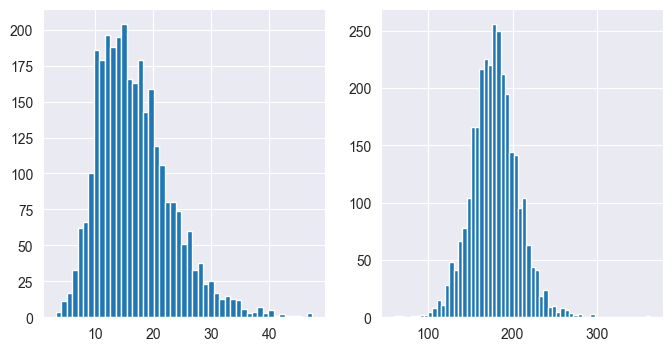

In [25]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
bin_x = int(x.max())
bin_y = int(y.count() / 50)
ax1.hist(x, bin_x)
ax2.hist(y, bin_y)
plt.show()

In [ ]:
# 1. Независимая переменная — это количественная непрерывная переменная.
# Переменная X равномерно распределяется на интервале от 3.2 до 47.4, делаем вывод о том,
# что это количественная непрерывная переменная.
# 2. Зависимая переменная — это количественная непрерывная переменная.
# Переменная Y равномерно распределяется на интервале от 59.7 до 362.8, делаем вывод о том,
# что это количественная непрерывная переменная.
# 3. Независимые наблюдения в каждой из выборок.
# Переменная X — это процент бедности в определенном регионе, есть крайне малая вероятность того,
# что есть влияние бедности одного региона на другой
# Переменная Y — это показатель уровня смертности. Маловероятно, что есть влияние смертности между регионами.

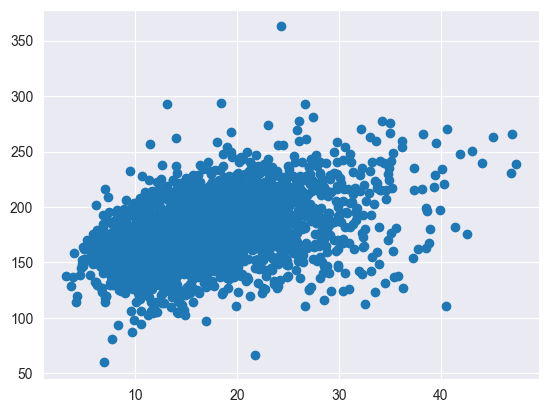

In [27]:
plt.scatter(x, y)
plt.show()

In [ ]:
# 4. Линейное распределение и линейность связи между переменными
# Судя по графику выше наблюдения распределяются линейно, также прослеживается определенная линейная взаимосвязь между ними.

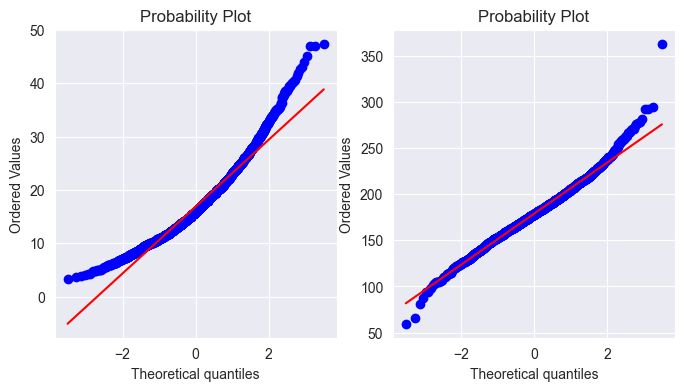

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
stats.probplot(x, dist="norm", plot=ax1)
stats.probplot(y, dist="norm", plot=ax2)
plt.show()

In [ ]:
# 5. Нормальность распределения.
# Распределение переменной X имеет сильно выраженное смещение влево, распределение переменной Y близко к нормальному.

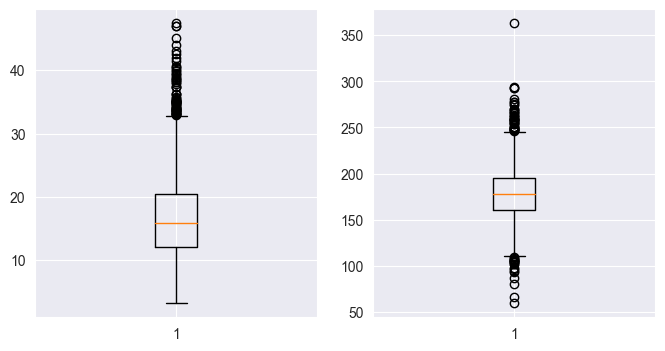

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.boxplot(x)
ax2.boxplot(y)
plt.show()

In [ ]:
# 6. Отсутствие выбросов
# Проанализировав гистограмму, график рассеивания и boxplot можно сделать вывод о том, что выбросы присутствуют.
# Особенно значительно по оси X для значений более 33. Удалим эти значения, чтобы понять влияние на нормальность распределения.

In [57]:
df_no_outliers = df[df['povertyPercent'] < 33]
x_no_outliers = df_no_outliers['povertyPercent']
y_no_outliers = df_no_outliers['TARGET_deathRate']
df.head()

,TARGET_deathRate,povertyPercent
0,164.9,11.2
1,161.3,18.6
2,174.7,14.6
3,194.8,17.1
4,144.4,12.5


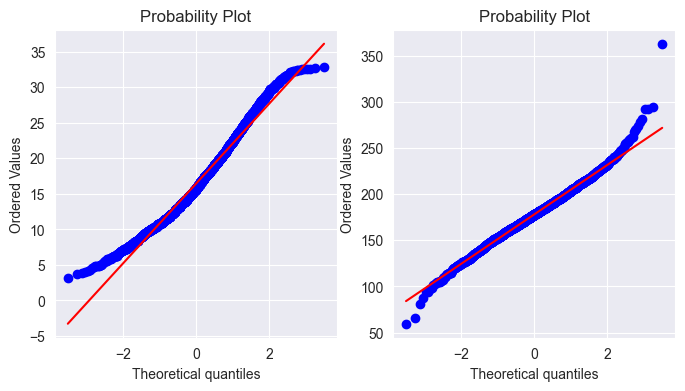

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
stats.probplot(x_no_outliers, dist="norm", plot=ax1)
stats.probplot(y_no_outliers, dist="norm", plot=ax2)
plt.show()

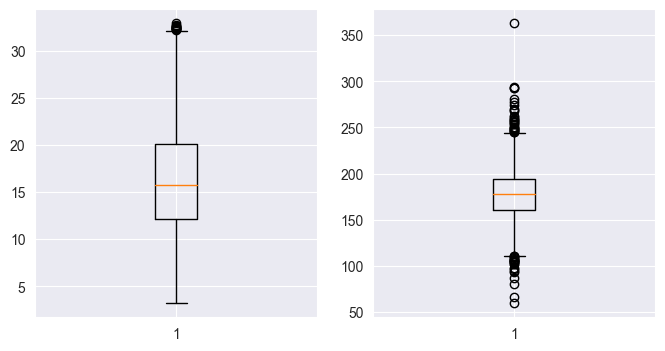

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.boxplot(x_no_outliers)
ax2.boxplot(y_no_outliers)
plt.show()

In [ ]:
# Распределение по переменной X стало ближе к нормальному. Также мы избавились от части выбросов.

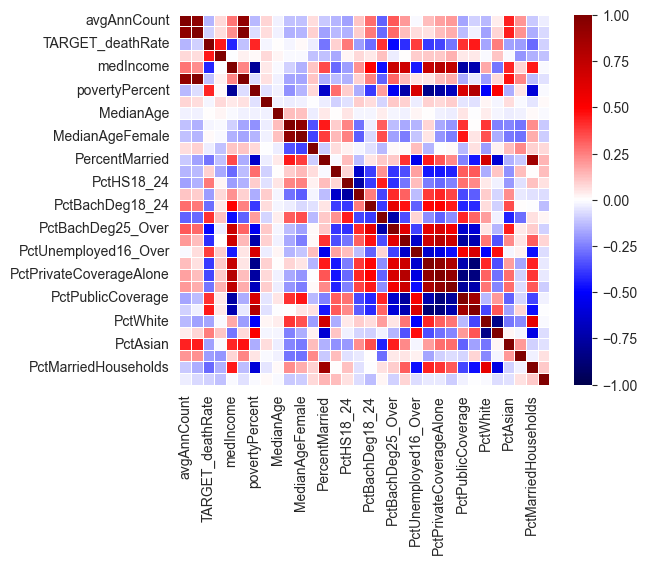

In [64]:
# 7. Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной
# Построим график взаимной корреляции переменных
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap='seismic',
          square=True, linewidths=.5, annot=False, fmt=".2f")
plt.show()

In [72]:
# Найдем переменные, которые наиболее связаны с переменной
corr = df.corr()
corr_death_rate = corr.loc['TARGET_deathRate']
corr_death_rate.sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
BirthRate                 -0.087407
avgDeathsPerYear          -0.090715
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctSomeCol18_24           -0.188688
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0

In [84]:
# Наиболее значимая связь наблюдается между переменной X и переменными:
# incidenceRate — показатель диагноз рака в среднем на душу населения (100 000)
# PctPublicCoverageAlone — процент жителей округа, имеющих только государственное медицинское страхование
# povertyPercent - процент населения за чертой бедности
# PctHS25_Over - процент жителей округа в возрасте 25 лет и старше с высшим образованием: аттестат о среднем образовании
# PctPublicCoverage — процент жителей округа с государственным медицинским страхованием
# PctUnemployed16_Over — процент жителей округа в возрасте 16 лет и старше, не имеющих работы
# PctHS18_24 — процент жителей округа в возрасте 18-24 лет с высшим образованием: аттестат о среднем образовании
# PctBlack — процент жителей округа, которые идентифицируют себя как чернокожие

# Найдем какие из них значительно взаимосвязаны с povertyPercent.
corr_poverty_percent = corr['povertyPercent']
corr_poverty_percent = corr_poverty_percent.loc[['incidenceRate', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctPublicCoverage', 'PctUnemployed16_Over', 'PctHS18_24', 'PctBlack']]
corr_poverty_percent.sort_values(ascending=False)

PctPublicCoverageAlone    0.798642
PctUnemployed16_Over      0.655148
PctPublicCoverage         0.651162
PctBlack                  0.511530
PctHS25_Over              0.194361
PctHS18_24                0.094211
incidenceRate             0.009046
Name: povertyPercent, dtype: float64

In [ ]:
# Мы видим, что наиболее взаимосвязаны следующие переменные:
# PctPublicCoverageAlone — скорее всего влияние оказывает бедность на долю жителей,
# которые имеют только гос. страхование.
# PctUnemployed16_Over — доля безработных влияет на бедность, но маловероятно,
# что уровень смертности зависит от того, работает человек или нет.
# PctPublicCoverage — скорее всего влияние оказывает бедность на долю жителей,
# которые имеют гос. страхование.
# PctBlack — маловероятно, что чернокожие жители живут меньше, чем белые.

# Делаем предварительный вывод, что нет 3-ей переменной, которая объясняет
# взаимосвязь между бедностью и смертностью.
# Для большей точности необходимо провести дополнительное исследование в рамках которого например
# разделить группы по номинативному признаку цвет кожи, затем изучить взаимосвязь переменных (в первую очередь линейность).

In [88]:
# Расчитаем коэффициент корреляции Пирсона (Pearsons correlation coefficient)
pcc = pd.DataFrame(np.corrcoef(x, y), index=['X', 'Y'], columns=['X', 'Y'])
pcc_no_outliers = pd.DataFrame(np.corrcoef(x_no_outliers, y_no_outliers), index=['X', 'Y'], columns=['X', 'Y'])
print('Коэффициент корреляции Пирсона')
print('Выборка с выбросами')
print(pcc)
print('Выборка без выбросов')
print(pcc_no_outliers)

Коэффициент корреляции Пирсона
Выборка с выбросами
          X         Y
X  1.000000  0.429389
Y  0.429389  1.000000
Выборка без выбросов
         X        Y
X  1.00000  0.41257
Y  0.41257  1.00000


In [12]:
# Альтернативный метод
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.42938898025645067
p_value 5.902636717519498e-137


In [ ]:
# Интерпретация результата
# Мы наблюдаем корреляцию между двумя переменными. Значение 0.42 говорит, что взаимосвязь не такая сильная.
# Нельзя сказать, что в 100% случаев смертность объясняется уровнем бедности. Как мы выяснили на уровень смертности
# значительное влияние также оказывают другие факторы.
# Удаление выбросов не улучшило качество модели. Можно сделать вывод, что на промежутке с выбросами также
# прослеживается линейная взаимосвязь между переменными.
# Значение P-value < 1e-136 говорит о практически нулевой вероятности того, что мы обнаружили взаимосвязь там где ее нет.

In [13]:
# Больше статистических методы в python
# https://realpython.com/numpy-scipy-pandas-correlation-python/

### Коэффициент корреляции Спирмена (Spearman's rank correlation coefficient)
**Дает более точный результат по сравнению с Пирсоном для выборок с существенными выбросами**

Коэффициент корреляции Спирмена - это непараметрический аналог коэффициента корреляции Пирсона, но при его расчете учитываются не связанные с распределением показатели сравниваемых переменных (среднее арифметическое и дисперсия), а ранги.

Так как этот коэффициент – аналог Пирсона, то и применение его для проверки гипотез аналогично применению коэффициента Пирсона. То есть проверяемая статистическая гипотеза, порядок принятия статистического решения и формулировка содержательного вывода – те же. В аналитических инструментах  уровни значимости для одинаковых коэффициентов  Пирсона и  Спирмена всегда совпадают.

Преимущество коэффициента Спирмена по сравнению с коэффициентом Пирсона – в большей чувствительности к связи.

**Лучше подходит для случаев:**
- наличие существенного отклонения распределения хотя бы одной переменной от нормального вида (асимметрия, выбросы, неоднородность дисперсии);
- появление криволинейной (монотонной) связи.

**Требования к данным**
- Независимая переменная — это количественная непрерывная переменная
- Зависимая переменная — это количественная непрерывная переменная
- Независимые наблюдения в каждой из выборок
- Нормальность распределения (некритичное требование).
- Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной


**Ограничением для применения коэффициента Спирмена:**
- по каждой переменной не менее 5 наблюдений;
- коэффициент при большом количестве одинаковых рангов по одной или обеим переменным дает огрубленное значение.


### Постановка задачи
Найти зависимость стоимости заказа от расстояния перевозки груза. Определить, как сильно дистанция влияет на итоговую стоимость.

In [ ]:
# Задача: выяснить есть ли статистически значимая зависимость стоимости заказа от дистанции грузоперевозки и как велика эта зависимость.
# Переформулируем задачу в гипотезы:
# Нулевая гипотеза: между двумя переменными нет статистически значимой взаимосвязи
# Альтернативная гипотеза: переменная Y значимо взаимосвязана с переменной X

# Убедимся в том, что данные отвечают критериям:
# 1. Независимая переменная — это количественная непрерывная переменная
# 2. Зависимая переменная — это количественная непрерывная переменная
# 3. Независимые наблюдения в каждой из выборок
# 4. Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной

In [2]:
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
# Independent variable
x = df['Distance']
# Dependent variable
y = df['Total']

In [3]:
print(f'x (min, max): {x.min()} - {x.max()}')
print(f'y (min, max): {y.min()} - {y.max()}')

x (min, max): 151466 - 1983208
y (min, max): 1 - 4800


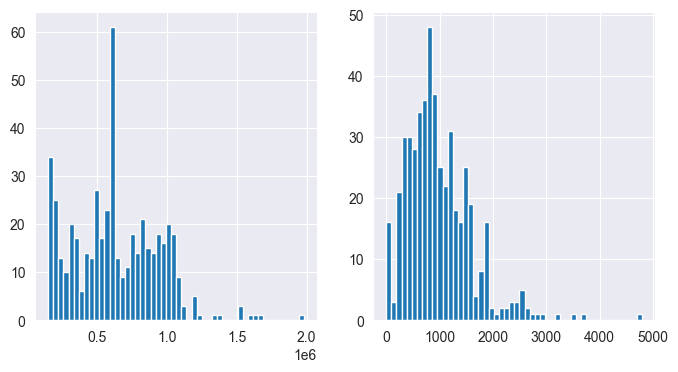

In [6]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.hist(x, 50)
ax2.hist(y, 50)
plt.show()

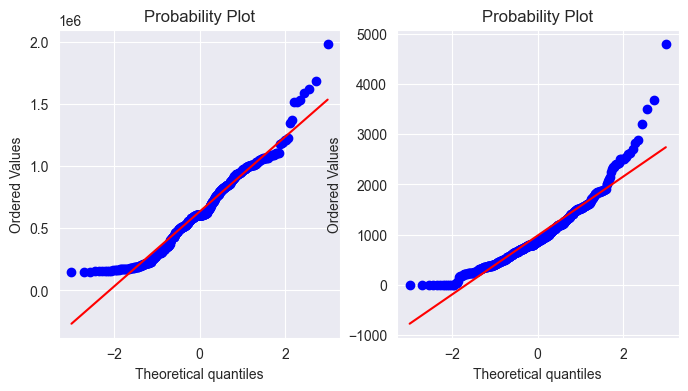

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
stats.probplot(x, dist="norm", plot=ax1)
stats.probplot(y, dist="norm", plot=ax2)
plt.show()

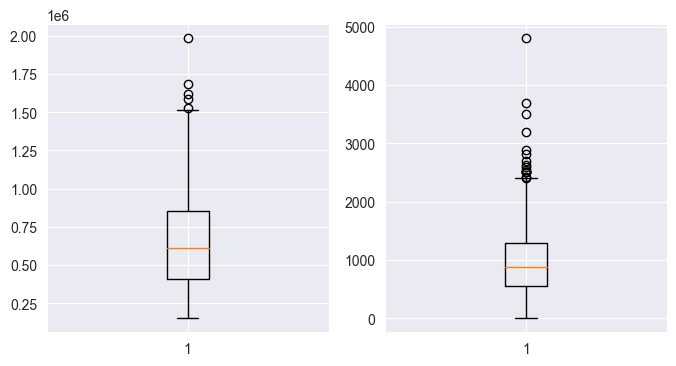

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.boxplot(x)
ax2.boxplot(y)
plt.show()

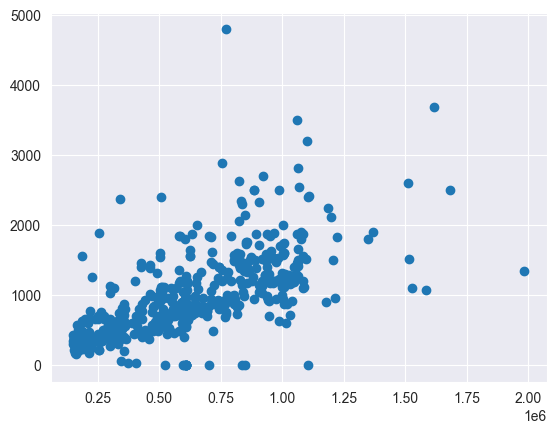

In [91]:
plt.scatter(x, y)
plt.show()

In [ ]:
# 1. Независимая переменная — это количественная непрерывная переменная
# 2. Зависимая переменная — это количественная непрерывная переменная
# Обе переменных равномерно распределены на широком диапазоне значений
# 3. Независимые наблюдения в каждой из выборок
# Каждая отдельная пара Xi и Yi — это параметры заказа, исключено влияние параметров одного заказа на другой
# 4. Взаимосвязь переменной X и переменной Y, не обусловлено 3 переменной
# К сожалению у нас недостаточно данных для проверки гипотезы. Последовательность действий описана в разделе о коэффициенте корреляции Пирсона.

# В результате предварительного анализа данных мы выяснили:
# 1. распределение X и Y значительно отличается от нормального
# 2. присутствуют выбросы
# Выполним тесты Пирсона и Спирмена.

In [15]:
# Коэффициент корреляции Пирсона
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.6362423205982423
p_value 2.075582009883922e-57


In [16]:
# Коэффициент корреляции Спирмана
result = stats.spearmanr(x, y)
print('spearman', result[0])
print('p_value', result[1])

spearman 0.7243458131338534
p_value 1.7150715266536816e-81


In [ ]:
# Интерпретация результата
# Мы наблюдаем корреляцию между двумя переменными. Тест Спирмена показал более значимую зависимость стоимости от расстояния.
# С учетом ненормальности распределения переменных делаем вывод, что тест Спирмена лучше справился с задачей поиска корреляции.
# Показатель корреляции 0.72 говорит о существенной взаимосвязи между переменными.
# Значение P-value < 1e-80 говорит о практически нулевой вероятности того,
# что в генеральной совокупности отсутствует взаимосвязь.

### Линейная регрессия (Linear regression)
Линейная регрессия — используемая в статистике регрессионная модель зависимости одной переменной y от другой. Позволяет предсказывать
значение зависимой переменной на основе значения независимой (predictor).

Модель создается по методу наименьших квадратов (OLS — ordinary least squares)
МНК (метод наименьших квадратов) - это способ нахождения оптимальных параметров линейной регрессии (b0, b1), таким образом, чтобы сумма
квадратов ошибок (остатков) была минимальная.
Остаток — это разница между значением реальной точки на графике и значением, которое предсказывает регрессионная прямая.
b0 - (intercept) значение точки пересечения линии с осью Y
b1 - (slope) задаёт наклон и направление линии регрессии

Формула линейной регрессии: Y = b0 + b1 * X

**Требования к данным**
- независимая переменная — это количественная непрерывная переменная
- зависимая переменная — это количественная непрерывная переменная
- независимые наблюдения в каждой из выборок
- линейная взаимосвязь между переменными X и Y
- нормальное распределение остатков
- гомоскедастичность остатков — постоянная переменчивость остатков на всех уровнях зависимой переменной


### Постановка задачи
Спрогнозировать стоимость для заказов с большим расстоянием.

In [ ]:
# Задача: Спрогнозировать стоимость для заказов с большим расстоянием.
# Построим модель линейной регрессии, которая лучше всего описывает поведение зависимой переменной. Найдем значения b0 и b1,
# чтобы воспользоваться формулой: Y = b0 + b1 * X для предсказания значений стоимости заказа.

# Мы используем датасет, который использовали в задаче с коэффициентом Спирмена.
# Разведочный анализ данных в задаче с коэффициентом позволил выяснить:
# независимая переменная — это количественная непрерывная переменная
# зависимая переменная — это количественная непрерывная переменная
# наблюдения независимы в каждой из выборок
# есть линейная взаимосвязь между переменными X и Y

# Проверим, что датасет отвечает требованиям:
# 1. нормальное распределение остатков
# 2. гомоскедастичность остатков — постоянная переменчивость остатков на всех уровнях зависимой переменной

In [41]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import linregress
from statsmodels.formula.api import ols

In [42]:
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
# Independent variable
x = df['Distance']
# Dependent variable
y = df['Total']

In [43]:
# Линейная зависимость между переменными X и Y
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.6362423205982423
p_value 2.075582009883922e-57


In [44]:
# Найдем остатки
# Синтаксис ols(формула, data=источник данных)
ols_model = ols('y ~ x', data=df).fit()

In [45]:
# Посчитаем предсказанные значения стоимости
model_fitted_y = ols_model.fittedvalues
df['Fitted Total'] = model_fitted_y
df.head(10)

,Distance,Total,Fitted Total
0,802591,1006,1197.244793
1,592503,600,929.924980
2,1005778,1600,1455.783647
3,615555,645,959.256766
4,615086,645,958.660002
5,646770,990,998.975303
6,646770,891,998.975303
7,301925,668,560.188219
8,375767,39,654.146130
9,932193,1293,1362.152747


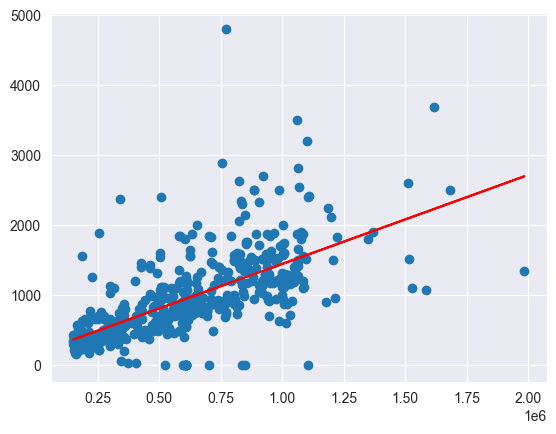

In [46]:
# Построим график линейной регрессии
plt.scatter(x, y)
plt.plot(x, model_fitted_y, color='r')
plt.show()

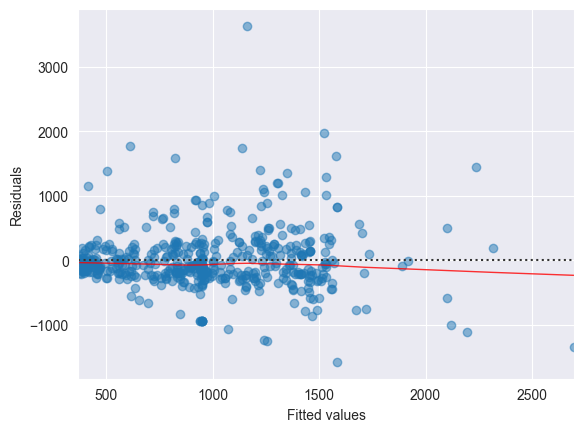

In [47]:
# Проверим гомоскедастичность остатков с помощью Residuals vs Fitted Plot
plot = sns.residplot(x=model_fitted_y, y='Total', data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')
plt.show()

In [48]:
# Мы видим, что остатки равномерно распределенный на протяжении всей зависимой переменной.
# Есть отклонение в нижней правой части графика, считаем его некритичным

In [49]:
# Проверим остатки на нормальность распределения
df['Residuals'] = df['Total'] - df['Fitted Total']
df.head(10)

,Distance,Total,Fitted Total,Residuals
0,802591,1006,1197.244793,-191.244793
1,592503,600,929.924980,-329.924980
2,1005778,1600,1455.783647,144.216353
3,615555,645,959.256766,-314.256766
4,615086,645,958.660002,-313.660002
5,646770,990,998.975303,-8.975303
6,646770,891,998.975303,-107.975303
7,301925,668,560.188219,107.811781
8,375767,39,654.146130,-615.146130
9,932193,1293,1362.152747,-69.152747


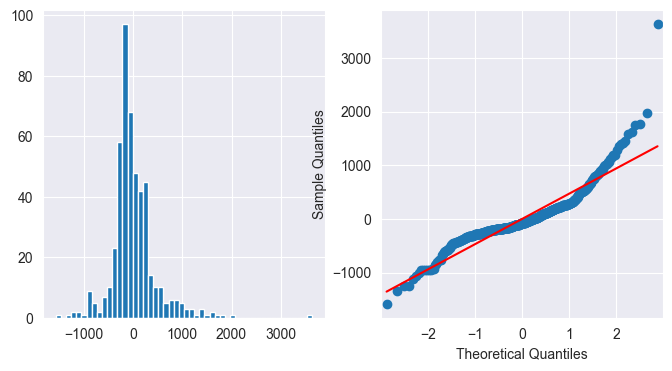

In [50]:
# Построим гистрограмму распределения остатков и QQ Plot для проверки распределения на нормальность
# Histogram of residuals and Normal Q-Q Plot of residuals
figure, axes = plt.subplots(1, 2, figsize=(8,4))
df['Residuals'].hist(ax=axes[0], bins=50)
sm.qqplot(df['Residuals'], line='s', ax=axes[1])
plt.show()

In [ ]:
# Можем сделать вывод, что датасет отвечает требованиям:
# 1. нормального распределение остатков
# 2. гомоскедастичности остатков

In [ ]:
# Выполним прогноз значений зависимой переменной

In [26]:
# Получим сводную информацию описательной статистики, она пригодится нам позже.
df_describe = df.describe().transpose()
df_describe

,count,mean,std,min,25%,50%,75%,max
Distance,494.0,6.332683e+05,305808.620721,151466.000000,407039.250000,608282.000000,851339.000000,1.983208e+06
Total,494.0,9.817955e+02,611.585348,1.000000,559.250000,872.500000,1298.250000,4.800000e+03
Fitted Total,494.0,9.817955e+02,389.116481,368.741436,693.937513,950.002468,1259.272639,2.699483e+03
Residuals,494.0,-1.436044e-13,471.831540,-1580.768326,-218.335538,-80.519393,175.961774,3.639757e+03


In [27]:
# Найдем b0 и b1
slope, intercept, pearson_r, p_value, std_err =  linregress(df['Distance'], df['Total'])
print('intercept (b0)', intercept)
print('slope', slope)
print('pearson_r', pearson_r)
print('r_squared', pearson_r ** 2)
print('p_value', p_value)
print('std_err', std_err)

intercept (b0) 176.01332833006074
slope 0.0012724182856668129
pearson_r 0.6362423205982424
r_squared 0.40480429052023664
p_value 2.07558200988387e-57
std_err 6.955921828974808e-05


In [28]:
# intercept = b0 , x = b1
ols_model = ols('y ~ x', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     334.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.08e-57
Time:                        18:24:55   Log-Likelihood:                -3741.8
No. Observations:                 494   AIC:                             7488.
Df Residuals:                     492   BIC:                             7496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.0133     48.908      3.599      0.000      79.920     272.107
x              0.0013   6.96e-05     18.293      0.000       0.001       0.001
==============================================================================
Omnibus:                      211.326   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1900.382
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      12.047   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Формула нашей модели линейной регрессии: y = 176 + 0.0013 * Distance

In [30]:
# H0: b1 = 0, нет взаимосвязи между переменными
# x P-value (P>|t|) < 0.05, intercept P-value (P>|t|) < 0.05, отклоняем H0

In [21]:
# Найдем R-squared, который показывает какой процент дисперсии объясняется нашей моделью
# Find R-squared, what percentage of variance is explained by our model
# R-squared = 0.40480429052023664, 40% дисперсии объясняется нашей моделью (не много).

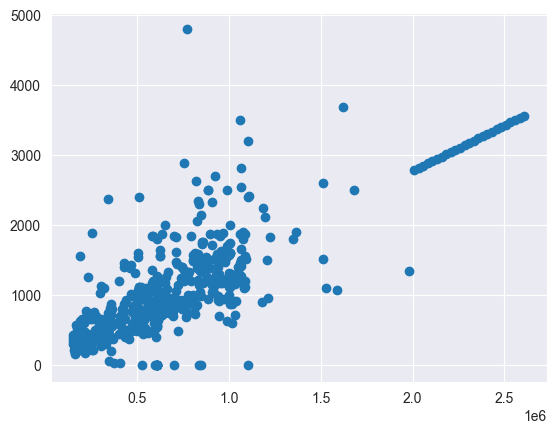

In [22]:
# Предскажем значения Y и построим график
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
df_predict = df
max_distance = df['Distance'].max()

for _ in range(25):
    max_distance += 25000
    fitted_total = 176 + 0.0013 * max_distance
    df_predict.loc[len(df_predict.index)] = [max_distance, fitted_total]

x = df_predict['Distance']
y = df_predict['Total']
plt.scatter(x, y)
plt.show()

### Хи-квадрат Пирсона (Chi-squared)
**Исследование взаимосвязи между двумя номинативными переменными**

Хи-квадрат Пирсона это непараметрический метод, который позволяет оценить значимость различий между фактическим
(выявленным в результате исследования) количеством исходов или качественных характеристик выборки,
попадающих в каждую категорию, и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы.
Выражаясь проще, метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

**Основные шаги**
1. Сформулировать задачу, H0 и HA
2. Провести разведывательный анализ данных, чтобы убедится в том, что данные отвечают требованиям
3. Получить значения chi2 (показывает силу отклонения), P-value (вероятность отклонить верную H0), degrees of freedom (нужны для расчета критического значения chi2), критическое значение chi2 (сравнив фактическое можно сделать вывод о значимости влияния).

<a href="https://lit-review.ru/biostatistika/kriterijj-khi-kvadrat-pirsona/">Последовательность действий подробнее</a>

**Требования к данным:**
1. Номинативные переменные с бинарными или порядковыми значениями. Более точный результат будет получен для бинарных номинативных переменных.
2. Независимость и случайность выборок
3. Общее количество наблюдений было более 20. С увеличением объема выборки точность критерия повышается;
4. Теоретическая (ожидаемая) частота для каждого выборочного интервала (соответствующая нулевой
гипотезе) должна, быть **более 5**. Если ожидаемое явление принимает значение менее 5, то необходимо
использовать точный критерий Фишера;
5. Если теоретическая (ожидаемая) частота в случае использования четырехпольных таблиц (2х2) принимает
значение **менее 10 (а именно 5<x<10)**, необходим расчет поправки Йетса;
6. Сравниваемые частоты должны быть примерно **одного размера**;


<a href="https://www.statology.org/correlation-between-categorical-variables/">Тесты для датасетов, которые не отвечают критериям</a>

**Постановка задачи**
Таблица содержит номинативные переменные OverallCond (Общая оценка состояния жилья), SaleCondition (Оценка состояния продажи).
Необходимо оценить влияние первой переменной на вторую.
Описание полей таблицы: <a href="https://www.kaggle.com/competitions/home-data-for-ml-course/data?select=train.csv">www.kaggle.com/competitions/home-data-for-ml-course/<a/>

In [24]:
# Задача: найти взаимосвязь и ее силу между общей оценкой состояния жилья и оценкой состояния продажи.
# Сформулируем гипотезы:
# Нулевая гипотеза: статистически значимой взаимосвязи между двумя переменными нет.
# Альтернативная гипотеза: присутствует статистически значимая взаимосвязь между двумя переменными.

# DISCLAIMER
# Датасет не соответствует требованиям к данным, все дальнейшие шаги сделаны для описания последовательности действий
# Шаг с EDA пропущен

In [88]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/housing_prices.csv', usecols=['OverallCond', 'SaleCondition'])
df.head()

,OverallCond,SaleCondition
0,5,Normal
1,8,Normal
2,5,Normal
3,5,Abnorml
4,5,Normal


In [172]:
# Подготовим таблицу сопряженности, где SaleCondition будут строками, а OverallCond колонками
table = sm.stats.Table.from_data(df[['SaleCondition', 'OverallCond']])
contingency_table = table.table_orig
contingency_table

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0,2,5,5,51,18,19,0,1
AdjLand,0,0,1,0,2,1,0,0,0
Alloca,0,0,1,1,7,1,2,0,0
Family,0,0,0,2,13,2,2,1,0
Normal,1,2,18,49,628,227,182,70,21
Partial,0,1,0,0,120,3,0,1,0


In [ ]:
# Хи-квадрат Пирсона не поодходит для датасета т.к. есть экстремально низкие значения > 5

In [174]:
# Рассчитаем ожидаемые значения
fit_val_table = table.fittedvalues
fit_val_table

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0.242775,0.450867,1.803468,4.023121,56.947977,17.479769,14.289017,5.098266,1.664740
AdjLand,0.016661,0.030942,0.123767,0.276097,3.908194,1.199592,0.980619,0.349881,0.114247
Alloca,0.033322,0.061884,0.247535,0.552193,7.816389,2.399184,1.961238,0.699762,0.228494
Family,0.052363,0.097246,0.388983,0.867732,12.282897,3.770146,3.081945,1.099626,0.359062
Normal,2.851411,5.295478,21.181911,47.251955,668.859572,205.301598,167.825910,59.879633,19.552533
Partial,0.303468,0.563584,2.254335,5.028902,71.184971,21.849711,17.861272,6.372832,2.080925


In [175]:
# Рассчитаем остатки
resid_table = table.resid_pearson

In [176]:
chi2, df, p_value = table.test_nominal_association().statistic, table.test_nominal_association().df, table.test_nominal_association().pvalue
print('chi2', chi2)
print('p_value', p_value)
print('df', df)

chi2 159.92757089234053
p_value 3.3306690738754696e-16
df 40


In [177]:
# Рассчитаем критическое значение chi2 с уровнем статистической значимости α = 0.1% (обычно 5%)
critical_value = scipy.stats.chi2.ppf(1-.001, df=df)
critical_value

73.40195751899103

In [185]:
# Отклоняем H0, принимаем HA. Фактическое значение chi2 значительно превышает критическое значение chi2 при α = 0.1% и df=40
# Есть взаимосвязь между общей оценкой состояния жилья и оценкой состояния продажи.
# Помним, что Хи-квадрат не подходит для датасета, возможны некорректные результаты теста.

In [179]:
chi2_table = table.chi2_contribs
chi2_table

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0.272536,5.322662,5.665648,0.237202,0.621241,0.015483,1.553176,4.147302,0.265434
AdjLand,14.021763,7.110612,6.203438,0.181577,0.931685,0.033209,0.235560,0.064410,1.302491
Alloca,6.535873,3.101719,2.287370,0.363154,0.085268,0.815992,0.000766,0.057026,0.322616
Family,3.826714,1.668050,0.031684,1.477450,0.041866,0.831113,0.379827,0.009026,0.055321
Normal,1.202115,2.050839,0.477981,0.064667,2.496046,2.293312,1.197103,1.710462,0.107155
Partial,0.127278,0.337943,1.365233,4.078614,33.474861,16.261616,16.875268,4.529748,1.201064


In [180]:
# Альтернативный способ решения задачи

In [181]:
from scipy.stats import chi2_contingency
# correction=True поправка Йетса

In [182]:
chi2, p_val, dof, exp = chi2_contingency(contingency_table, correction=True)
print('chi2', chi2)
print('p_value', p_val)
print('df', dof)

chi2 137.55985115904573
p_value 1.2393483603234845e-12
df 40


In [183]:
# Cramer’s V (коэффициент корреляции двух номинативных переменных, который применяют для таблиц более 2x2) принимает значение от 0 до 1
# Interpretation of effect size
# ES ≤ 0.2 The result is weak. Although the result is statistically significant, the fields are only weakly associated.
# 0.2 < ES ≤ 0.6 The result is moderate. The fields are moderately associated.
# ES > 0.6 The result is strong. The fields are strongly associated.
contingency_table = np.array(contingency_table)
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# Calculate Cramer's V
result = np.sqrt((chi2 / N) / minimum_dimension)
result

0.1372727767158024

In [184]:
# Интерпретация результата
# Мы получили крайне малое значение коэффициента корреляции Крамера равное 0.13. Хотя результат статистически значим, переменные слабо связаны.

### F-тест (критерий Фишера)
Если ожидаемое явление принимает значение менее 5, то необходимо использовать точный критерий Фишера.

**Интерпретация результатов теста**
Тест возвращает показатели odds ratio(шансы) и P-value.
Odds ratio — это отношение шансов положительного сценария к негативному.
В примере ниже положительный сценарий — это кол-во женщин демократов и мужчин республиканцев, отрицательный это женщины республиканцы и мужчины демократы.
Если Odds ratio > 1 выше шансы положительного сценария, если < 1 выше шансы отрицательного, если = 1, то шансы равны.

**P-value**
1 Hypothesis for Fisher’s Exact Test (Alternative: Two Sided):
H0: Odds ratio равен 1 (принимаем если P-value >= 0.05)
HA: Odds ratio не равен 1 (принимаем если P-value < 0.05)

2 Hypothesis for Fisher’s Exact Test (Alternative: Less):
HO: Odds ratio равен или больше 1 (принимаем если P-value >= 0.05)
HA: Odds ratio меньше 1 (принимаем если P-value < 0.05)

3 Hypothesis for  Fisher’s Exact Test (Alternative: Greater):
HO: Odds ratio равен или меньше 1 (принимаем если P-value >= 0.05)
HA: Odds ratio больше 1 (принимаем если P-value < 0.05)


**Требование к данным**
Таблица сопряженности размером не более 2x2

### Постановка задачи

Определить существует ли статистически значимая связь между полом и предпочтениями политической партии.

In [27]:
import pandas as pd
from scipy.stats import fisher_exact

In [28]:
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df

,Женщины,Мужчины
Демократ,8,4
Республиканец,4,9


In [33]:
odds_ratio, p_val = fisher_exact(df, alternative='two-sided')
print('шансы', odds_ratio)
print('p_value', p_val)

шансы 4.5
p_value 0.11523854393015787


In [36]:
odds_ratio, p_val = fisher_exact(df, alternative='less')
print('шансы', odds_ratio)
print('p_value', p_val)

шансы 4.5
p_value 0.9868805645828125


In [37]:
odds_ratio, p_val = fisher_exact(df, alternative='greater')
print('шансы', odds_ratio)
print('p_value', p_val)

шансы 4.5
p_value 0.08117800896102145


In [39]:
# Интерпретация результатов
# Статистически значимой зависимости между полом и политическими предпочтениями не обнаружены

# 1-ая гипотеза. P-value = 0.11. Он показывает, что с вероятностью (1-0.11) 89% отношение шансов не будет равно 1,
# а с вероятностью 11% отношение шансов будет равно 1. Если мы установим уровень достоверности на уровне 95%,
# мы не можем отвергнуть нулевую гипотезу потому, что 0.11 выше 0.05 (1-0.95)
# Это означает, что существует значительная вероятность того, что отношение шансов может быть равно 1 в популяции (другие избиратели).
# Мы обнаружили высокую вероятность того, что отношение шансов не будет равно 1. Из-за этого нам также нужно проверить,
# может ли отношение шансов быть меньше 1 или нет.

# 2-ая гипотеза. P-value = 0.98. Он показывает, что с вероятностью 2% отношение шансов не будет меньше 1,
# а с вероятностью 98% отношение шансов будет равно или больше 1. Если мы установим уровень достоверности на уровне 95%,
# мы не можем отвергнуть нулевую гипотезу потому, что 0,98 больше 0,05.
# Это означает, что существует значительная вероятность того, что отношение шансов будет равно или больше 1 в популяции (другие избиратели).

# 3-ая гипотеза. P-value = 0.08. Он показывает, что с вероятностью 92% отношение шансов будет больше 1,
# а с вероятностью 8% отношение шансов будет равно или меньше 1. Если мы установим уровень достоверности на уровне 95%,
# мы не можем отвергнуть нулевую гипотезу потому, что 0.08 больше 0.05.
# Это означает, что существует даже крошечная вероятность того, что отношение шансов может быть равно или меньше 1
# в популяции (другие избиратели).

### T-критерий Стьюдента (T-test)
**Используем для анализа 2-х выборок**

Переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется зависимая переменная.

<a href="https://www.kaggle.com/code/kappernielsen/independent-t-test-example/notebook">Последовательность действий</a>

**Интерпретация результатов теста**
Тест возвращает:
- T-критерий — это разница между средними двух выборок деленное на стандартную ошибку среднего. Если несколько упростить, то можно сказать, что T-критерий показывает как сильно средние отличаются друг от друга. Деление на стандартную ошибку среднего позволяет привести T-критерий в общую шкалу измерения.
- Degrees of freedom — кол-во степеней свободы, нужны для расчета P-value
- P-value — вероятность того, что на самом деле в генеральной совокупности разницы между средними нет. Если P-value < 0.05 отвергаем H0, если P-value >= 0.05 принимаем.
- Доверительный 95% интервал — показывает диапазон, где с 95% вероятностью находится истинное среднее (среднее генеральной совокупности). Сравнив два интервала можно увидеть как диапазон перекрытия.

<a href='https://r-analytics.blogspot.com/2012/03/t.html'>Подробнее в статье</a>


**Требования к данным**
- Количественный непрерывный тип данных, дискретные данные менее желательны
- Независимая переменная относится к номинативному типа (в идеале с двумя градациями)
- Независимые между собой выборки
- Независимые наблюдения в каждой из выборок
- Нормальность распределения
- Гомогенность дисперсии
- Отсутствие выбросов.

### Постановка задачи
Выяснить есть ли влияние пола на общую итоговую оценку учащихся.

In [ ]:
# Перед тем, как приступить к T-тесту, сформулируем ряд предположений о том, что наши данные отвечают критериям для проведения T-теста:
# 1. Зависимая переменная — это количественная непрерывная переменная
# 2. Независимая переменная — это номинативная переменная, которая разбивает данные на две независимых между друг другом выборки
# 3. Наблюдения не влияют друг на друга (независимы)
# 4. Нет значительных выбросов
# 5. Зависимая переменная нормально распределяется в каждой из групп
# 6. Дисперсия гомогенна (однородна)

In [192]:
# Задача: выяснить есть ли статистически значимое различие в итоговой оценки между мальчиками и девочками.
# Переформулируем задачу в две гипотезы: 1) Между группами нет значительных различий в итоговой оценке, это будет нулевая гипотеза H0.
# 2) Альтернативная гипотеза между группами есть различия, это гипотеза HA.
# Наша зависимая переменная это итоговая оценка, которая имеет градацию от 0 до 20 (кстати, это порядковая переменная (ordinal), что может отрицательно сказаться
# на нормальности распределения и как результат невозможности применения Т-теста).
# Зависимая переменная: итоговая оценка (G3), независимая переменная: пол (sex).
# Давайте убедимся, что наши данные отвечают критериям:
# 1. Зависимая переменная — это количественная непрерывная переменная
# Итоговая оценка может принимать любое значения от 0 до 20, что отвечает требованию к непрерывности. Есть нюанс с тем, что переменная порядковая,
# проверим нормальность распределения позже.
# 2. Независимая переменная — это номинативная переменная, которая разбивает данные на две независимых между друг другом выборки.
# Пол — это бинарная номинативная переменная, каждая оценка принадлежит конкретному мальчику или девочке. Вероятность того, что оценки мальчиков и девочек как-то
# влияют друг на друга стремится к нулю.
# 3. Наблюдения не влияют друг на друга (независимы)
# Оценку получает конкретный ученик, поэтому можно предположить, что отсутствует влияние одной оценки на другую.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

In [180]:
# Импортируем данные, нас интересуют две колонки: 'sex' и 'G3'
url = 'https://raw.githubusercontent.com/betelgeus/study/master/data/student-mat.csv'

df = pd.read_csv(url, usecols=['sex', 'G3'])
df.head()

,sex,G3
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [54]:
# Независимая переменная
x = df['sex']
# Зависимая переменная
y = df['G3']

AttributeError: 'AxesSubplot' object has no attribute 'kde'

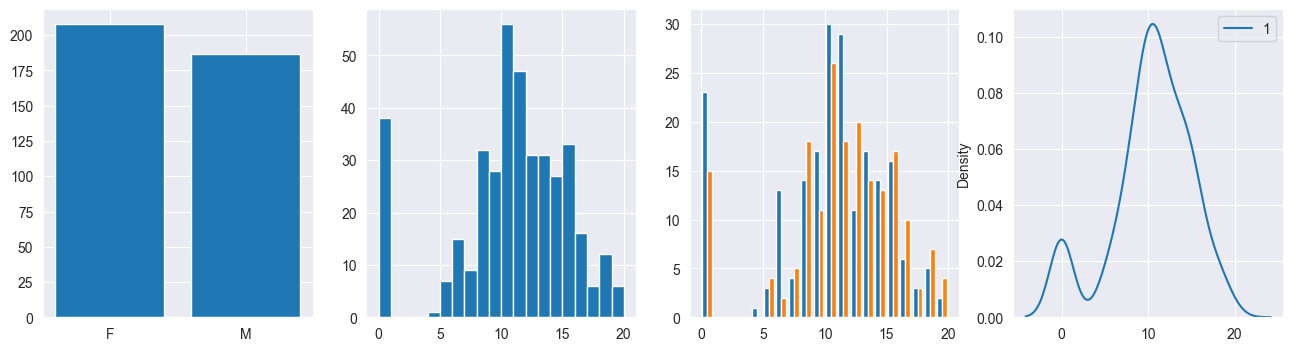

In [55]:
# 4. Нет значительных выбросов
bins = df['G3'].max()
y_f = df['G3'][df.sex == 'F']
y_m = df['G3'][df.sex == 'M']

figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
ax1.bar(['F', 'M'], [y_f.count(), y_m.count()])
ax2.hist(y, bins)
ax3.hist([y_f, y_m], bins, label=['F', 'M'])
kde = sns.kdeplot(np.array(df))
ax4.kde()
plt.legend()
plt.show()

In [56]:
# 1-ый график. Количество девочек незначительно больше, чем мальчиков. Можно сделать вывод, что наши выборки имеют схожий размер
# 2-ой график. Как и предполагалось есть большое кол-во людей, которые не прошли тест (получили отметку 0), что в итоге сместит влево
# результат любого анализа средних значений.
# 3-ий график. Пол не влияет на успешность прохождения теста, не прошедших учащихся много как среди мальчиков, так и девочек.
# 4-ий график. Существенность смещения также подтверждается графиком плотности.
# Мы должны решить, следует ли исключить наблюдения с отметкой 0 из нашей окончательной модели.

In [57]:
mean_f = y_f.mean()
mean_m = y_m.mean()

mean_f_no_zero = y_f[y_f > 0].mean()
mean_m_no_zero = y_m[y_m > 0].mean()
print('mean female', mean_f)
print('mean male', mean_m)
print('difference', abs(mean_f - mean_m))
print('mean female without zero score', mean_f_no_zero)
print('mean male without zero score', mean_m_no_zero)
print('difference', abs(mean_f_no_zero - mean_m_no_zero))

mean female 9.966346153846153
mean male 10.914438502673796
difference 0.9480923488276431
mean female without zero score 11.205405405405406
mean male without zero score 11.866279069767442
difference 0.6608736643620361


In [58]:
# Разница между средними сокращается с 0,95 до 0,66. Принимаем решение убрать нулевые значения
y_f_no_zero = y_f[y_f > 0]
y_m_no_zero = y_m[y_m > 0]

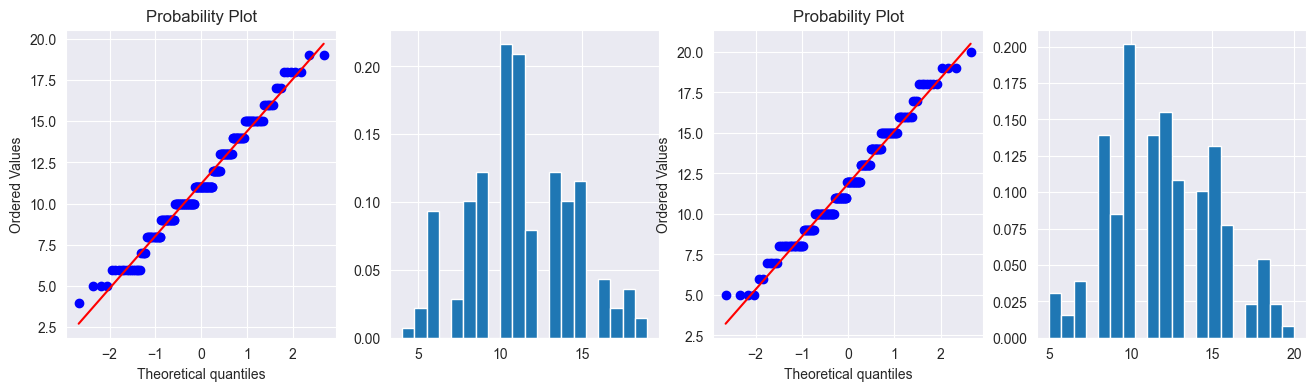

In [59]:
# 5. Зависимая переменная нормально распределяется в каждой из групп

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
stats.probplot(y_f_no_zero, dist="norm", plot=ax1)
ax2.hist(y_f_no_zero, bins, density=True)
stats.probplot(y_m_no_zero, dist="norm", plot=ax3)
ax4.hist(y_m_no_zero, bins, density=True)
plt.show()

In [60]:
# Можно сделать вывод, что распределение близко к нормальному.

In [72]:
# 6. Гомогенность дисперсии.
# Для оценки гомогенности дисперсии используем два теста: Критерий Бартлетта (Bartlett's test) и тест Левена (Levene's test).
barlets_result = stats.bartlett(y_f_no_zero, y_m_no_zero)
print('K-squared', barlets_result.statistic)
print('p_value', barlets_result.pvalue)
levene_result = stats.levene(y_f_no_zero, y_m_no_zero)
print('Test result', levene_result.statistic)
print('p_value', levene_result.pvalue)

K-squared 0.1214772696636538
p_value 0.7274377618424044
Test result 0.6144552033049334
p_value 0.4336379490863752


In [73]:
# Значение p-value значительно выше 0.05 (оба теста). Можно сделать вывод, что дисперсия гомогенна.

In [74]:
# Перейдем к проверке наших гипотез

In [75]:
# Получим результаты T-теста
t_test_result = stats.ttest_ind(y_f_no_zero, y_m_no_zero)
print('Результат теста', t_test_result.statistic)
print('P-value', t_test_result.pvalue)

Результат теста -1.9404771273257526
P-value 0.053113174845791505


In [83]:
# Выполним тест Т-критерий Уэлча (Welch t-test)
# Используется для проверки статистической гипотезы о равенстве случайных величин, имеющих необязательно равные известные дисперсии.
# Важно!!! В этом примере не нужен так, как тесты Бартлетта и Левена показали гомогенность дисперсии (p_value >= 0.05)


def welch_test(x, y):
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    t, p = stats.ttest_ind(x, y, equal_var = False)
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
    return t, p, dof


t_value, p_value, dof = welch_test(y_f_no_zero, y_m_no_zero)


 Welch's t-test= -1.9386 
 p-value = 0.0533 
 Welch-Satterthwaite Degrees of Freedom= 351.5376


In [77]:
# Подготовим таблицу с основными статистическими параметрами наших выборок. Они нужны для расчета 95% доверительного интервала.
summary_table = pd.DataFrame(data=[y_f_no_zero.describe(), y_m_no_zero.describe()], index=['F', 'M'])
summary_table['se'] = stats.sem(y_f_no_zero), stats.sem(y_m_no_zero)
summary_table

,count,mean,std,min,25%,50%,75%,max,se
F,185.0,11.205405,3.174452,4.0,9.0,11.0,13.0,19.0,0.233390
M,172.0,11.866279,3.258748,5.0,10.0,12.0,14.0,20.0,0.248477


In [79]:
# Добавим в таблицу 95% доверительный интервал отклонения среднего. Он будет нужен для графика доверительных интервалов
summary_table['t * se'] = t_value * summary_table['se']
summary_table['95 low'] = summary_table['mean'] + summary_table['t * se']
summary_table['95 high'] = summary_table['mean'] - summary_table['t * se']
summary_table

,count,mean,std,min,25%,50%,75%,max,se,t * se,95 low,95 high
F,185.0,11.205405,3.174452,4.0,9.0,11.0,13.0,19.0,0.233390,-0.452455,10.752950,11.657861
M,172.0,11.866279,3.258748,5.0,10.0,12.0,14.0,20.0,0.248477,-0.481703,11.384576,12.347982


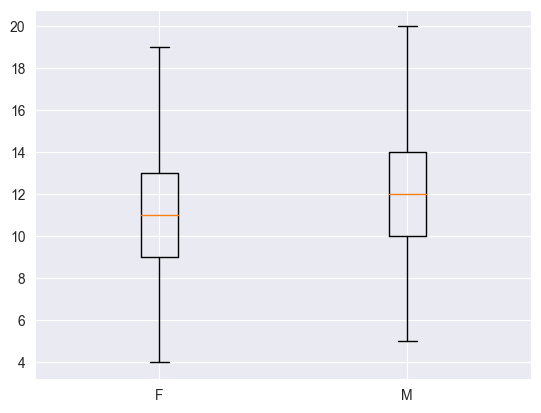

In [80]:
# Строим boxplot
plt.boxplot([y_f_no_zero, y_m_no_zero], vert=True, labels=['F', 'M'])
plt.show()

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_993/265458622.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=summary_table.index, y=summary_table['mean'], yerr=summary_table['t * se'], color="black",


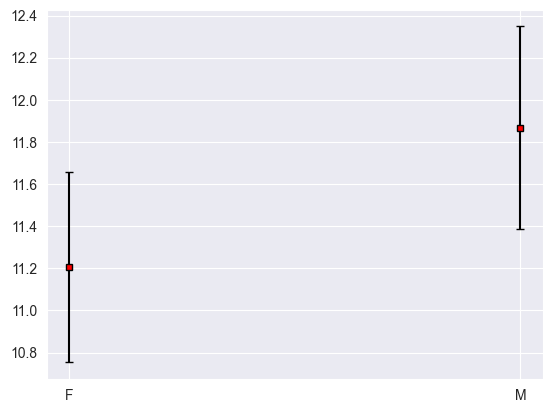

In [81]:
# Строим график доверительных интервалов
plt.errorbar(x=summary_table.index, y=summary_table['mean'], yerr=summary_table['t * se'], color="black",
             capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
plt.show()

In [90]:
print('Welch Two Sample t-test Result')
print(f't = {t_value}, df = {dof}, p-value = {p_value}')
if p_value < 0.05:
    print('Верна альтернативная гипотеза: истинная разница в средних не равна 0')
else:
    print('Верна нулевая гипотеза: истинная разница в средних равна 0')
print('95% доверительный интервал для первой выборки')
print(round(summary_table.at['M', '95 low'], 2), '-' ,round(summary_table.at['M', '95 high'], 2))
print('95% доверительный интервал для второй выборки')
print(round(summary_table.at['F', '95 low'], 2), '-' ,round(summary_table.at['F', '95 high'], 2))

Welch Two Sample t-test Result
t = -1.9386213026002415, df = 351.5376185137594, p-value = 0.05334760933558723
Верна нулевая гипотеза: истинная разница в средних равна 0
95% доверительный интервал для первой выборки
11.38 - 12.35
95% доверительный интервал для второй выборки
10.75 - 11.66


In [91]:
# Интерпретация результата
# Мы получили P-value равное 0.53. С одной стороны значение больше 0.05 (и тем более 0.01, которое обычно применяется в реальных исследованиях),
# что позволяет нам принять нулевую гипотезу. Сделать вывод, что нет зависимость между полом и оценкой.
# С другой стороны полученное значение P-value незначительно отличается от порогового значения.
# Правильнее всего было бы повторить исследования, использовав более объемную выборку.

### Однофакторный дисперсионный анализ (One-Way ANOVA)

**Используем для анализа 3-х и более выборок**

Переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. Количественная переменная, по степени выраженности которой мы сравниваем группы, называется зависимая переменная.

<a href="https://www.scribbr.com/statistics/one-way-anova/">Последовательность действий</a>
<a href="https://www.kaggle.com/code/evitaginiyatullina/one-way-anova-comparison/notebook">Пример на Python</a>

**Краткое описание метода**
Метод основан на сравнении дисперсии между выборками с дисперсией внутри выборок. Если изменчивость между выборками значительно превышает изменчивость внутри выборок можно сделать вывод, что есть статистически значимые различия между группами.

1. Находим среднее для каждой выборки
2. Считаем SSW — сумму квадратов внутри групп (sum of square within groups)
3. Считаем SSB — сумму квадратов между группами (sum of square between groups)
4. Находим MS — средний квадрат (mean square), отношение суммы квадратов к числу их степеней свободы внутри групп и между группами
5. Находим критерий Фишера — отношение MSbeetwen к MSwithin
6. Сравниваем полученное значение с критическим значением

Интересное наблюдение
- Если основной вклад в SST делает SSB, то мы можем сделать вывод, что значимые различия наблюдаются между группами
- Если основной вклад в SST делает SSW, то мы можем сделать вывод, что значимы различия внутри групп

**Интерпретация результатов теста**
В результате теста мы получаем:
- значение F-критерия
- P-value

Если значение F-критерия превышает критическое значение, мы можем сделать вывод того, что нашли статистически значимое различие между группами.
Величина F-критерия показывает как сильно группы различаются между друг другом.
P-value — вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет (верная H0)


**Требования к данным**
- Зависимая переменная — это количественная непрерывная переменная, дискретные данные менее желательны
- Независимые между собой выборки
- Независимые наблюдения в каждой из выборок
- Нормальность распределения
- Отсутствие выбросов (дисперсионный анализ очень чувствителен к выбросам)
- Гомогенность (однородностью) дисперсии.

Если есть выбросы и данные распределяются ненормально, то лучше использовать непараметрическими способами анализа. Например, H-критерием Краскела-Уоллеса.
Обратить внимание, возможно один фактор может значительно влиять на другой фактор.

<a href="https://pozdniakov.github.io/tidy_stats/anova.html">доп. материал про ANOVA</a>

### Постановка задачи
Некая компания разработала 3 диеты. Мы получили результаты исследования, наша цель понять какая из диет самая эффективная.

In [93]:
# Задача: Найти самую эффективную диету, проанализировав результаты исследования.
# Сформулируем гипотезы
# Нулевая гипотеза: Статистически значимой разницы между эффективностью диет нет, они абсолютно одинаковые
# Альтернативная гипотеза: Эффективность диет отличается.

# Сформулируем статистические предположения:
# 1. Зависимая переменная — это количественная непрерывная переменная
# 2. Выборки независимы между собой
# 3. Наблюдения независимые в каждой из выборок
# 4. Исследуемый признак нормально распределен
# 5. Выбросы отсутствуют
# 6. Дисперсия однородна.

# Перед тем, как проверять гипотезы проведем разведывательный анализ данных, чтобы убедиться в том, что наши предположения верны

In [154]:
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway

In [155]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/Diet_R.csv')
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        90 non-null     int64  
 1   gender        90 non-null     int64  
 2   Age           90 non-null     int64  
 3   Height        90 non-null     int64  
 4   pre.weight    90 non-null     int64  
 5   Diet          90 non-null     int64  
 6   weight6weeks  90 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [159]:
# Выполним разведывательный анализ данных
# Показатель эффективности диеты - это разница веса до начала эксперимента и после окончания.
# Добавим в таблицу колонку с результатами диеты — это и будет наша зависимая переменная.
df['diet.Result'] = df['pre.weight'] - df['weight6weeks']
y = df['diet.Result']
y_diet_1 = df['diet.Result'][df.Diet == 1]
y_diet_2 = df['diet.Result'][df.Diet == 2]
y_diet_3 = df['diet.Result'][df.Diet == 3]
# Можно так:
# df.groupby("Diet").Person.count()

# Также мы знаем, что первоначальный вес значительно влияет на то, как сильно человек может похудеть. Если в одну группу
# попало больше худых, а в другую толстых испытуемых есть вероятность того, что мы получим некорректный результат теста.
# Чтобы избежать такой ситуации, добавим корректирующий индекс массы тела, сравним также его изменения.
df['BMI_start'] = df["pre.weight"] / (df["Height"] / 100)**2
df["BMI_end"] = df["weight6weeks"] / (df["Height"] / 100)**2
df["BMI_change"] = df['BMI_start'] - df["BMI_end"]

y_diet_bmi_1 = df['BMI_change'][df.Diet == 1]
y_diet_bmi_2 = df['BMI_change'][df.Diet == 2]
y_diet_bmi_3 = df['BMI_change'][df.Diet == 3]

print('Total')
print(f'min {y.min()}, max {y.max()}, count {y.count()}')
print('Diet 1')
print(f'min {y_diet_1.min()}, max {y_diet_1.max()}, count {y_diet_1.count()}')
print('Diet 2')
print(f'min {y_diet_2.min()}, max {y_diet_2.max()}, count {y_diet_2.count()}')
print('Diet 3')
print(f'min {y_diet_3.min()}, max {y_diet_3.max()}, count {y_diet_3.count()}')

Total
min -2.1000000000000014, max 9.200000000000003, count 90
Diet 1
min -0.5999999999999943, max 9.0, count 30
Diet 2
min -2.1000000000000014, max 7.900000000000006, count 30
Diet 3
min 0.5, max 9.200000000000003, count 30


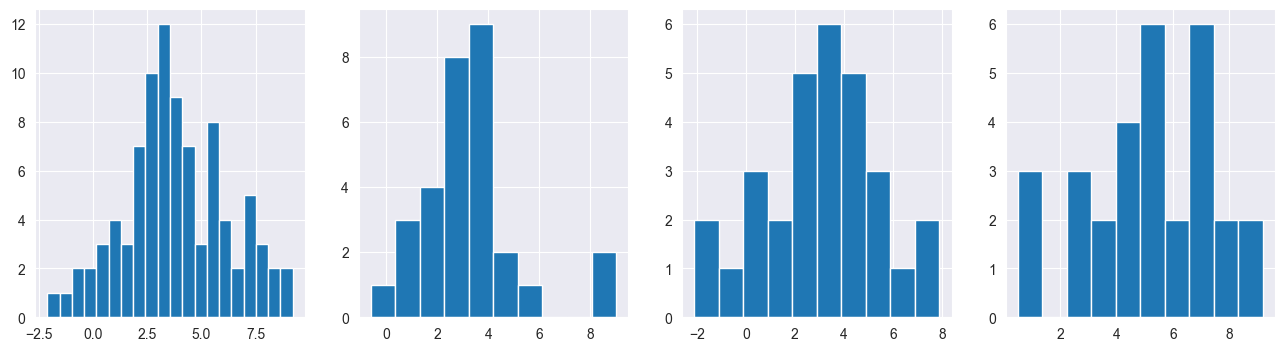

In [125]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
ax1.hist(y, bins=20)
ax2.hist(y_diet_1, bins=10)
ax3.hist(y_diet_2, bins=10)
ax4.hist(y_diet_3, bins=10)
plt.show()

In [152]:
# 1. Зависимая переменная — это количественная непрерывная переменная
# Мы видим, что зависимая переменная непрерывно распределена на интервале от -2 до 9
# Схожая картина наблюдается в каждой из выборок.

# 2. Выборки независимы между собой
# 3. Наблюдения независимые в каждой из выборок
# В рамках исследования испытуемые были разделены на 3 группы. В каждой группе использовалась одна конкретная диета.
# Наблюдение — это результат конкретного человека, на который не влияет результат другого человека.
# Делаем вывод, что 2 и 3 предположения верны

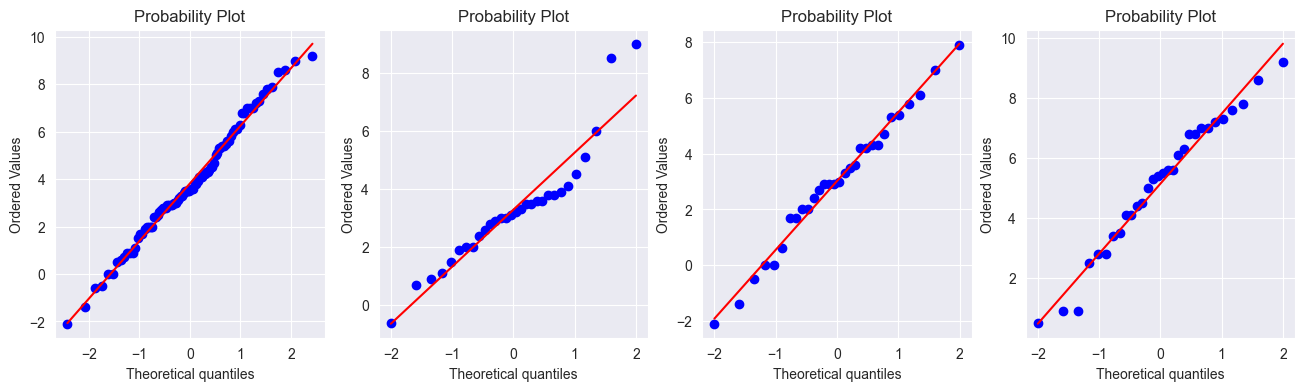

In [126]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
stats.probplot(y, dist='norm', plot=ax1)
stats.probplot(y_diet_1, dist='norm', plot=ax2)
stats.probplot(y_diet_2, dist='norm', plot=ax3)
stats.probplot(y_diet_3, dist='norm', plot=ax4)
plt.show()

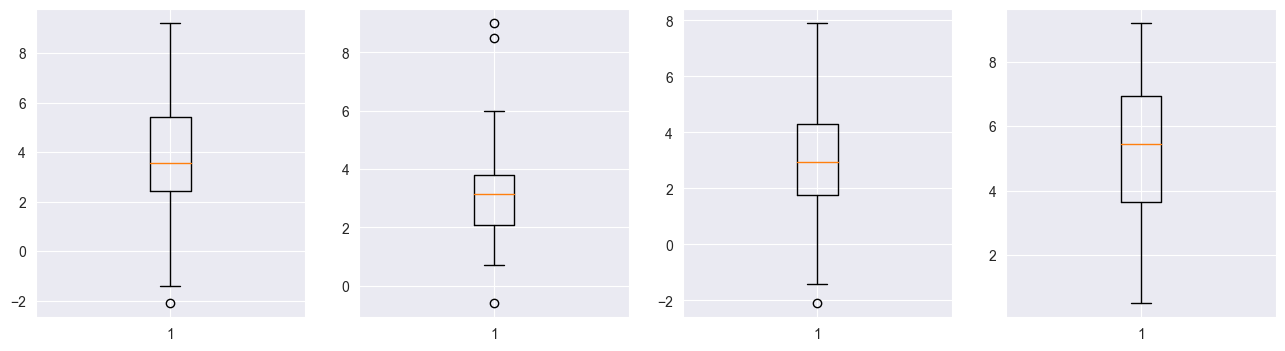

In [131]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.boxplot(y)
ax2.boxplot(y_diet_1)
ax3.boxplot(y_diet_2)
ax4.boxplot(y_diet_3)
plt.show()

In [161]:
# 4. Исследуемый признак нормально распределен.
# 5. Выбросы отсутствуют.
# Подтверждаем 4 и 5 предположения. Распределение близко к нормальному, значительные выбросы отсутствуют.

In [127]:
# 6. Гомогенность дисперсии.
# Для оценки гомогенности дисперсии используем два теста: Критерий Бартлетта (Bartlett's test) и тест Левена (Levene's test).
barlets_result = stats.bartlett(y_diet_1, y_diet_2, y_diet_3)
print('K-squared', barlets_result.statistic)
print('p_value', barlets_result.pvalue)
levene_result = stats.levene(y_diet_1, y_diet_2, y_diet_3)
print('Test result', levene_result.statistic)
print('p_value', levene_result.pvalue)

K-squared 0.922731081428054
p_value 0.6304221902968313
Test result 1.1011844522249155
p_value 0.33706574303942544


In [128]:
# Значение P-value превышает 0.05 в обоих тестах, делаем вывод, что дисперсия гомогенна.

In [132]:
# Переходим к проверке гипотез

In [134]:
diet_1 = y_diet_1.to_list()
diet_2 = y_diet_2.to_list()
diet_3 = y_diet_3.to_list()

In [163]:
# Найдем общее среднее
mean = df['diet.Result'].mean()
mean

3.817777777777778

In [135]:
# Найдем SST (total summ of square) общую сумму квадратов. Параметр объясняет силу дисперсии между и внутри групп
diets = [diet_1, diet_2, diet_3]
sst = 0
for diet in range(len(diets)):
    for change in range(len(diets[diet])):
        sst+=((diets[diet][change] - mean)**2)

print(sst)

513.0515555555553


In [164]:
# Найдем степень свободы между группами
df_1 = 3 - 1

In [165]:
# Найдем (sum of square within groups) сумму квадратов внутри групп и среднее для каждой группы
def ssw(data):
    meann = sum(data) / len(data)
    ssw = 0
    for i in range(len(data)):
        ssw += (data[i]-meann)**2
    return meann, ssw

In [138]:
ssw_1 = ssw(diet_1)
ssw_2 = ssw(diet_2)
ssw_3 = ssw(diet_3)

In [166]:
ssw_full = ssw_1[1] + ssw_2[1] +ssw_3[1]
ssw_full

432.0366666666665

In [140]:
# Найдем степень свободы внутри групп
df_2 = 90 - 3

In [141]:
# Найдем (sum of square between groups) сумму квадратов между группами
ssb = 30*((ssw_1[0]-mean)**2+(ssw_2[0]-mean)**2+(ssw_3[0]-mean)**2)
ssb

81.01488888888885

In [142]:
# Найдем значение F-критерия
ssb/df_1/(ssw_full/df_2)

8.157056885603843

In [147]:
# Более короткий путь с помощью готового метода библиотеки scipy.stats
f_oneway(y_diet_1, y_diet_2, y_diet_3)

F_onewayResult(statistic=8.157056885603838, pvalue=0.0005664251271760918)

In [167]:
# Найдем F значение для BMI (индекс массы человека)
f_oneway(y_diet_bmi_1, y_diet_bmi_2, y_diet_bmi_3)

F_onewayResult(statistic=11.491246302710522, pvalue=3.728315951810503e-05)

In [171]:
# Найдем критическое значение F-критерия
# ppf(q=уровень стат. значимости, dfn=кол-во степеней свободы между группами, dfd=кол-во степеней свободы внутри групп)
alpha = .05
stats.f.ppf(q=1-alpha, dfn=df_1, dfd=df_2)

3.101295756667187

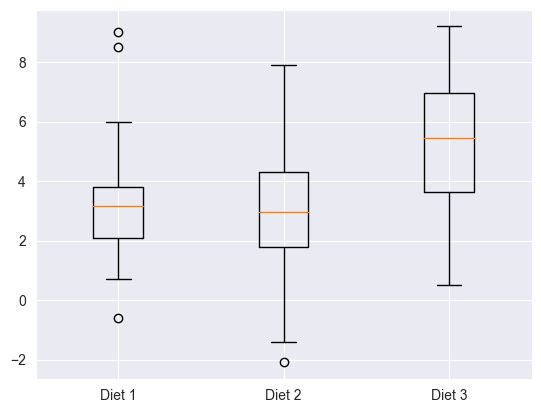

In [162]:
# Построим графики для лучшей наглядности результатов
plt.boxplot([diet_1, diet_2, diet_3], vert=True, labels=['Diet 1', 'Diet 2', 'Diet 3'])
plt.show()

In [172]:
# Интерпретация результатов
# 1. Мы получили значение F-критерия, которое существенно превышает критическое значение.
# 2. P-value значительно ниже 5%, что позволяет отклонить нулевую гипотезу.
# 3. Вероятность того, что мы получим различия равные или более 8.15 составляет 0.05% при верной нулевой гипотезе.
# 4. F-критерий при сравнении изменения индекса массы тела человека также значительно превышает критическое значение.

# Мы получили весьма весомые аргументы, которые позволяет сделать вывод, что эффективность диет отличается, лучше всего себя показала 3 диета.

### U-критерий Манна-Уитни
**Используем, когда выборки не отвечают требованиям T-критерия**
- Распределения хотя бы в одной из выборок значительно отличается от нормального
- Размер выборки менее 30 наблюдений
- Есть заметные выбросы в данных.

В некоторых задачах мощность теста даже выше, чем T-критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении).

**Не стоит использовать:**
Выборки разного размера, с различным направлением асимметрии.

**Описание метода**
К большому сожалению, поскольку формула t-критерия включает в себя средние значения, то этот критерий будет давать неадекватные результаты при наличии выбросов.

Чтобы этого избежать, вы можете либо исключить эти выбросы из анализа, либо воспользоваться непараметрическим U-критерием Манна-Уитни . Кстати, этот критерий используется и в тех ситуациях, когда точные значения элементов в выборке нам не известны. Чтобы рассчитать критерий Манна-Уитни, необходимо выстроить все элементы в один ряд, от самого мелкого к самому крупному, и назначить им ранги. Самому большому элементу достанется первый ранг, а самому маленькому – последний.

После этого мы снова делим их на две выборки и считаем суммы рангов отдельно для первой и для второй. Общая логика такова: чем сильнее будут различаться эти суммы, тем больше различаются выборки

Сравниваем U-критерий с критическим значением, чтобы понять есть ли статистически значимое различие между группами.

**Интерпретация результатов теста**
В результате теста мы получаем:
- значение U-критерия
- P-value

Если значение U-критерия превышает критическое значение, мы можем сделать вывод того, что нашли статистически значимое различие между группами.
Величина U-критерия показывает как сильно группы различаются между друг другом.
P-value — вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет (верная H0)

**Требования к данным**
Количественный непрерывный тип данных, категорийные переменные
Независимая переменная относится к номинативному типа (в идеале с двумя градациями)
Независимые между собой выборки
Независимые наблюдения в каждой из выборок


### Постановка задачи
Выяснить есть ли влияние пола на общую итоговую оценку учащихся.

In [173]:
# В примере с T-тестом мы уже решали эту задачу. В процессе разведывательного анализа данных мы выяснили,
# что присутствуют значительные выбросы. Мы были вынуждены исключать наблюдения с выбросами из выборки.
# Давайте теперь используем непараметрических тест Манна-Уитни, который не чувствителен к выбросам.
# Также T-тест дал пограничные результаты, которые не позволяли сделать однозначный вывод. U-критерия считается более чувствительным,
# возможно он окажется более результативным.

In [174]:
# Статистические предположения
# Пропустим шаг, результаты можно посмотреть в разделе с T-критерием

In [186]:
import pandas as pd
import scipy.stats as stats

In [181]:
# Импортируем данные, нас интересуют две колонки: 'sex' и 'G3'
url = 'https://raw.githubusercontent.com/betelgeus/study/master/data/student-mat.csv'

df = pd.read_csv(url, usecols=['sex', 'G3'])
df.head()

,sex,G3
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [189]:
y_f = df['G3'][df.sex == 'F']
y_m = df['G3'][df.sex == 'M']

In [188]:
u_test, p_val = stats.mannwhitneyu(y_f, y_m, use_continuity=True, alternative='two-sided')
print('U test', u_test)
print('P value', p_val)

U test 17138.0
P value 0.040653027692554924


In [190]:
# Интерпретация результатов
# Вот незадача, но решения для расчета критического значения на python я не нашел. Таблица критических значений есть только
# для выборок с размером до 20 наблюдений, что тоже не наш случай.
# И так будет делать выводы на основе полученного значения P-value, которое меньше 0.05, что позволяет отвергнуть нам нулевую гипотезу.
# Хотя опять-таки значение крайне пограничное и если мы решим, что alpha = 0.01, то не сможем отвергнуть нулевую гипотезу.

### Логистическая регрессия
Логистическая регрессия - это статистическая модель, которая позволяет исследовать взаимосвязи между номинативной зависимой переменной и различными предикторами. Логистическая регрессия используется для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой.

**типы предикторов**:
- номинативные
- количественные

**кол-во предикторов**:
- один
- несколько

Логистическая регрессия также позволяет найти взаимосвязь между предикторами.

**Краткое описание метода**
Ключевые термины:
- Вероятность (p) - число от 0 до 1, вероятность положительного исхода
- Шансы (odds) - число от 0 до ∞, шансы положительного исхода
- Логарифм (log(odds)) шансов - число от -∞ до ∞

Логистическая модель позволяет предсказать вероятность положительного исхода (1— положительный, 0 — отрицательный). Но вместо бинарного значения мы получаем число от 0 до 1 (чем выше, тем выше вероятность).

1. Находим intercept, логарифм шансов положительного исхода с помощью логистической модели.
2. Находим шансы, извлекаем экспоненту из логарифма шансов
3. Рассчитываем вероятность p = odds / (1 + odds)

**Последовательность действий**
1. Импорт библиотек
2. Импорт данных
3. EDA
4. Подтверждение стат. предположений
5. Выбор наиболее точной модели
5. Обучение модели
6. Проверка точности предсказания, оценка модели
7. Предсказание
8. Интерпретация результатов

<a href='https://www.justintodata.com/logistic-regression-example-in-python/'>Пример на Python</a>

**Требования к данным**
- Зависимая переменная — это бинарная переменная
- Независимые наблюдения в каждой из выборок
- Отсутствие мультиколлинеарности (тесная взаимосвязь независимых переменных, например, возраст и рост ученика)
- Отсутствие выбросов
- Достаточно большой размер выборок
- Линейная зависимость между независимой переменной (ыми) и логитом вероятности (logit(p)  = log(p / (1-p)))

<a href='https://www.statology.org/assumptions-of-logistic-regression/'>Assumptions of Logistic Regression</a>
<a href='https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290'>Еще одна статья</a>
<a href='https://github.com/kennethleungty/Logistic-Regression-Assumptions/blob/main/Logistic_Regression_Assumptions.ipynb'>Подробный пример на Python</a>

### Разберем несколько примеров:
- один номинативный предиктор
- два номинативных предиктора
- один количественный предиктор
- один номинативный и один количественный предиктор

#### Один номинативный предиктор

#### Постановка задачи
Спрогнозировать шансы выживания на Титанике в зависимости от пола пассажира.

In [540]:
# Задача: Спрогнозировать шансы выживания на Титанике в зависимости от пола пассажира
# Построим модель логистической регрессии, которая лучше всего описывает поведение зависимой переменной. Найдем значения b0 (intercept) и b1(slope),
# чтобы воспользоваться формулой: log(odds) = b0 + b1 * X для предсказания вероятности выжить.

# Проверим верность статистических предположений:
# 1. Зависимая переменная — это бинарная переменная
# 2. Наблюдения независимы между собой
# 3. Отсутствует мультиколлинеарность
# 4. Отсутствуют выбросы
# 5. Размер выборок достаточно большой
# 6. Есть линейная зависимость между независимой переменной (ыми) и логитом вероятности

In [541]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [505]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep = '\t')
# df = df[df.Age.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [506]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [507]:
y = df['Survived']
y.unique()

array([0, 1])

In [508]:
x = df['Sex']
x.unique()

array(['male', 'female'], dtype=object)

In [509]:
# 1. Зависимая переменная — это бинарная переменная
# Зависимая переменная принимает значения 0 и 1, где 0 — пассажир не выжил, 1 — пассажир выжил.

# 2. Наблюдения независимы между собой
# Есть крайне низкая вероятность того, что выживаемость одного пассажира влияла на выживаемость другого

# 3. Отсутствует мультиколлинеарность
# Мы рассматриваем пример с одним номинативным предиктором. Сделаем допущение, что в нашем датасете больше нет предикторов.
# Соответственно, нет факторов, которые могут взаимосвязаны между собой.
# В примере с несколькими предикторами разберем мультиколлинеарность подробнее.

# 4. Отсутствуют выбросы
# Обе переменные принимают бинарное значения, что исключают возможность выбросов.

In [510]:
# Подготовим таблицу сопряженности, где Survived будут строками, а Sex колонками
contingency_table = pd.crosstab(df.Survived, df.Sex)
contingency_table

Sex,female,male
Survived,,
0,81,734
1,385,109


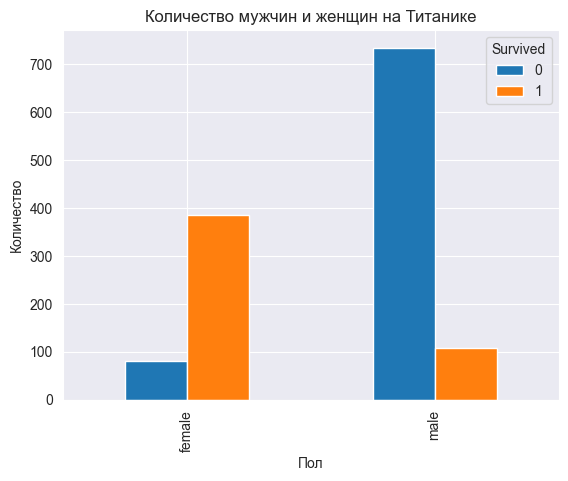

In [511]:
# Визуализируем таблицу сопряженности
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

In [512]:
# 5. Размер выборок достаточно большой.
# Воспользуемся правилом 20:1, где первое число это кол-во наблюдений в наименее вероятном исходе, а второе кол-во параметров.
# В нашем случае 81:2, что превышает соотношение 20:1

In [513]:
# 6. Есть линейная зависимость между независимой переменной (ыми) и логитом вероятности
# Так как независимая переменная номинативная, то не требуется

In [514]:
# Построим модель логистической регрессии с помощью метод glm из библиотеки statsmodels
# Формула 'Интерсепт ~ Предиктор'
# 'Интерсепт ~ С(Предиктор)' — если предиктор содержит несколько градаций, позволяет получить стат. данные по каждому
# 'Интерсепт ~ Предиктор1 + Предиктор2' — добавляем еще один предиктор
# 'Интерсепт ~ Предиктор1 * Предиктор2' — добавляем еще один предиктор, учитываем взаимодействие предикторов

In [515]:
lm_binomial = smf.glm(formula='Survived ~ Sex', data=df, family=sm.families.Binomial())
result = lm_binomial.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1307
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -539.84
Date:                Tue, 18 Oct 2022   Deviance:                       1079.7
Time:                        18:59:52   Pearson chi2:                 1.31e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5588      0.122     12.752      0.000       1.319       1.798
Sex[T.male]    -3.4660      0.160    -21.713      0.000      -3.779      -3.153
===============================================================================
"""

In [516]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept      1.558794
Sex[T.male]   -3.465955
dtype: float64

p-Values
Intercept       3.049505e-37
Sex[T.male]    1.536959e-104
dtype: float64

Dependent variables
Survived


In [517]:
# Мы получили следующие результаты:
# Логарифм шансов выжить у женщин составляет 1.558794
# Логарифм отношения шансов для мужчин к шансам у женщин составляет -3.465995
# Найдем логарифм шансов у мужчин с помощью формулы логистической регрессии log(odds) = b0 + b1 * X
log_odds_male = result.params[0] + result.params[1] * 1
log_odds_male

-1.9071611463743836

In [518]:
# Рассчитаем шансы:
odds_male = np.exp(log_odds_male)
odds_male

0.14850136239945194

In [519]:
# Рассчитаем вероятность:
p = odds_male / (1 + odds_male)
p

0.1293001186251991

In [520]:
# Предскажем вероятности выжить с помощью функции Logit() из библиотеки statsmodels
# Решение задач с помощью других библиотек: https://realpython.com/logistic-regression-python/#logistic-regression-in-python

In [521]:
# Подготовим данные
# Logit() по умолчанию не добавляет интерсепт
# Добавим его вручную, добавим первой строкой константу 1
# Первая колонка интерсепт, вторая пол
x = sm.add_constant(x)
x

,const,Sex
0,1.0,male
1,1.0,female
2,1.0,female
3,1.0,female
4,1.0,male
...,...,...
1304,1.0,male
1305,1.0,female
1306,1.0,male
1307,1.0,male


In [522]:
# Logit() принимает на вход int значения, преобразуем наши данные
x.Sex = x.Sex.map({'male': 1, 'female': 0})

In [523]:
# Создадим и обучим модель
model = sm.Logit(y, x)

In [524]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.412408
         Iterations 6


In [525]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1307
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3778
Time:                        19:00:09   Log-Likelihood:                -539.84
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                1.459e-144
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5588      0.122     12.752      0.000       1.319       1.798
Sex           -3.4660      0.160    -21.713      0.000      -3.779      -3.153
==============================================================================
"""

In [526]:
result.params

const    1.558794
Sex     -3.465955
dtype: float64

In [527]:
# Оценим точность предсказания модели
# Предскажем возможные значения исхода
result.predict(x)

0       0.12930
1       0.82618
2       0.82618
3       0.82618
4       0.12930
         ...   
1304    0.12930
1305    0.82618
1306    0.12930
1307    0.12930
1308    0.12930
Length: 1309, dtype: float64

In [528]:
# Если шанс равен или более 0.5, считаем что пассажир выжил, если менее считаем, что не выжил
(result.predict(x) >= 0.5).astype(int)

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Length: 1309, dtype: int64

In [531]:
# Таблица с результатами предсказания
# Колонки: 0: мужчины, 1: женщины
result.pred_table()

array([[734.,  81.],
       [109., 385.]])

In [532]:
contingency_table

Sex,female,male
Survived,,
0,81,734
1,385,109


In [533]:
# Вывод: модель предсказывает с высокой точностью

In [534]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1307
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3778
Time:                        19:01:02   Log-Likelihood:                -539.84
converged:                       True   LL-Null:                       -867.57
Covariance Type:            nonrobust   LLR p-value:                1.459e-144
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5588      0.122     12.752      0.000       1.319       1.798
Sex           -3.4660      0.160    -21.713      0.000      -3.779      -3.153
==============================================================================
"""

In [535]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.378      
Dependent Variable: Survived         AIC:              1083.6841  
Date:               2022-10-18 19:01 BIC:              1094.0381  
No. Observations:   1309             Log-Likelihood:   -539.84    
Df Model:           1                LL-Null:          -867.57    
Df Residuals:       1307             LLR p-value:      1.4588e-144
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const      1.5588     0.1222    12.7517   0.0000    1.3192    1.7984
Sex       -3.4660     0.1596   -21.7133   0.0000   -3.7788   -3.1531
==================================================================

"""

#### Два номинативных предиктора

### Постановка задачи
Спрогнозировать шансы выживания на Титанике в зависимости от пола и класса билета пассажира

In [477]:
# Задача: Спрогнозировать шансы выживания на Титанике в зависимости от пола и класса билета пассажира
# 1. Подтвердим статистические предположения
# 2. Построим модель логистической регрессии, которая лучше всего описывает поведение зависимой переменной. Найдем значения b0 (intercept) и b1(slope),
# чтобы воспользоваться формулой: log(odds) = b0 + b1 * X для предсказания шансов выжить.
# 3. Обучим модель предсказывать шансы
# 4. Проверим точность предсказания
# 5. Предскажем шансы

In [478]:
# Подтвердим верность статистических предположений:
# 1. Зависимая переменная — это бинарная переменная
# 2. Наблюдения независимы между собой
# 3. Отсутствует мультиколлинеарность
# 4. Отсутствуют выбросы
# 5. Размер выборок достаточно большой
# 6. Есть линейная зависимость между независимой переменной (ыми) и логитом вероятности

# Шаг подробно разобрали в примере с одним номинативным предиктором

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

In [484]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep = '\t', usecols=['Survived', 'Sex', 'Pclass'])

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   int64 
 1   Pclass    1309 non-null   int64 
 2   Sex       1309 non-null   object
dtypes: int64(2), object(1)
memory usage: 30.8+ KB


In [486]:
# Преобразуем номинативные переменные 'Sex', 'Pclass' в бинарные колонки, пропустив первое значение
df_dummy = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)
df_dummy

,Survived,Sex_male,Pclass_2,Pclass_3
0,0,1,0,1
1,1,0,0,0
2,1,0,0,1
3,1,0,0,0
4,0,1,0,1
...,...,...,...,...
1304,0,1,0,1
1305,1,0,0,0
1306,0,1,0,1
1307,0,1,0,1


In [487]:
# Проверим модель, чтобы убедиться в точности предсказания исхода. Разделим первоначальный набор данных на два: обучающий и тестовый.
# Для этого мы можем использовать метод train_test_split со следующими характеристиками:
# test_size = 0,2: сохранить 20% исходного набора данных в качестве тестового набора данных, т. е. 80% в качестве набора обучающих данных.
# stratify = df[‘Survived’]: когда набор данных несбалансирован, рекомендуется проводить стратифицированную выборку.
# Таким образом, наборы данных для обучения и тестирования будут иметь те же части целевых классов, что и полный набор данных.

# Для проверки равномерности распределения исходов выведем на печать результаты.

In [488]:
random_seed = 888
df_train, df_test = train_test_split(df_dummy, test_size=0.2, random_state=random_seed, stratify=df_dummy['Survived'])

print(df.shape)
print(df_train.shape)
print(df_test.shape)
print()
print(df_dummy['Survived'].value_counts(normalize=True))
print()
print(df_train['Survived'].value_counts(normalize=True))
print()
print(df_test['Survived'].value_counts(normalize=True))

(1309, 3)
(1047, 4)
(262, 4)

0    0.622613
1    0.377387
Name: Survived, dtype: float64

0    0.622732
1    0.377268
Name: Survived, dtype: float64

0    0.622137
1    0.377863
Name: Survived, dtype: float64


In [489]:
# Реализуем функцию, которая будет возвращать данные переменных X и y
# Функция пригодится для тестового набора данных
def get_features_and_target_arrays(df):
    X = df[['Sex_male', 'Pclass_2', 'Pclass_3']].to_numpy()
    y = df['Survived']
    return X, y

X, y = get_features_and_target_arrays(df_dummy)

In [490]:
X[:3]

array([[1, 0, 1],
       [0, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [491]:
y[:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [492]:
clf = LogisticRegression(penalty='none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [493]:
clf.intercept_

array([2.71563758])

In [494]:
clf.coef_

array([[-3.63759123, -0.83919644, -1.7131828 ]])

In [495]:
# Проверим, что модель работает корректно, сверим intercept и коэффициенты
lm_binomial = smf.glm(formula='Survived ~ Sex + C(Pclass)', data=df, family=sm.families.Binomial())
result = lm_binomial.fit()
result.params

Intercept         2.715635
Sex[T.male]      -3.637589
C(Pclass)[T.2]   -0.839193
C(Pclass)[T.3]   -1.713181
dtype: float64

In [496]:
# Получим значения X и Y для тестового набора данных
X_test, y_test = get_features_and_target_arrays(df_test)

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


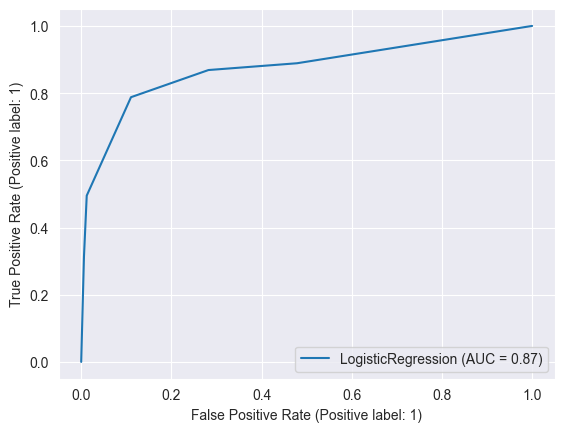

In [497]:
# Для идеального классификатора график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев
# составляет 100% или 1,0 (идеальная чувствительность), а доля ложно положительных примеров равна нулю.
# Поэтому чем ближе кривая к верхнему левому углу, тем выше предсказательная способность модели.
# Наоборот, чем меньше изгиб кривой и чем ближе она расположена к диагональной прямой, тем менее эффективна модель.
# Диагональная линия соответствует «бесполезному» классификатору, т.е. полной неразличимости двух классов.
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [498]:
# AUC = 0.87, вероятность разделить классы составляет 87%, модель работает отлично
# 0.8 <= AUC <= 1.0 — модель работает превосходно;
# 0.6 <= AUC < 0.8 — модель работает хорошо;
# 0.5 <= AUC < 0.6  — модель работает удовлетворительно;
# AUC < 0.5 — модель не работает.

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


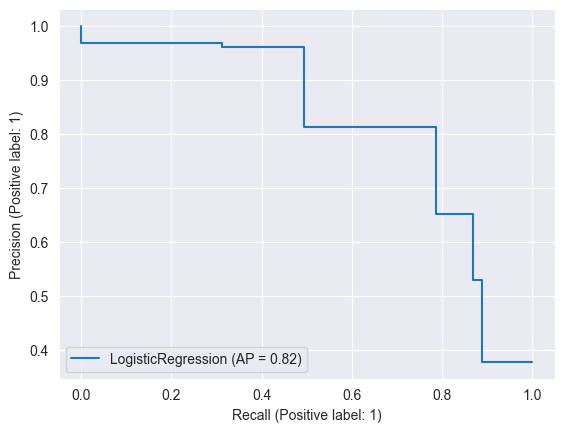

In [499]:
# Precision (точность) можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.
# Recall (полнота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
# Очень толковая статья и картинка, которая лучше объясняет первые два предложения: https://habr.com/ru/company/ods/blog/328372/
# Чем больше площадь под кривой, тем точнее модель
# Чем ближе значение AP к единице, тем выше точность
plot_precision_recall_curve(clf, X_test, y_test)
plt.show()

In [500]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [501]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.39479
AUC = 0.87371
Average Precision = 0.82138

Using 0.5 as threshold:
Accuracy = 0.85115
Precision = 0.81250
Recall = 0.78788
F1 score = 0.80000

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       163
           1       0.81      0.79      0.80        99

    accuracy                           0.85       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262



Confusion Matrix


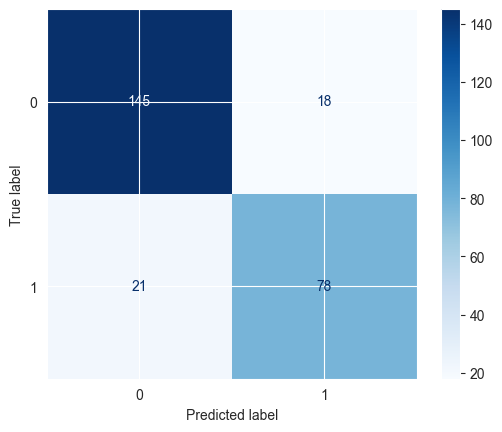

In [502]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [503]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + ['Sex_male', 'Pclass_2', 'Pclass_3'], 'coefficient': coefficients})

,variable,coefficient
0,intercept,2.715638
1,Sex_male,-3.637591
2,Pclass_2,-0.839196
3,Pclass_3,-1.713183


#### Один количественный предиктор

### Постановка задачи
Спрогнозировать шансы выживания на Титанике в зависимости от возраста пассажира

In [538]:
# Задача: Спрогнозировать шансы выживания на Титанике в зависимости от возраста пассажира
# 1. Подтвердим статистические предположения
# 2. Построим модель логистической регрессии, которая лучше всего описывает поведение зависимой переменной. Найдем значения b0 (intercept) и b1(slope),
# чтобы воспользоваться формулой: log(odds) = b0 + b1 * X для предсказания шансов выжить.
# 3. Обучим модель предсказывать шансы
# 4. Проверим точность предсказания
# 5. Предскажем шансы

In [539]:
# Подтвердим верность статистических предположений:
# 1. Зависимая переменная — это бинарная переменная
# 2. Наблюдения независимы между собой
# 3. Отсутствует мультиколлинеарность
# 4. Отсутствуют выбросы
# 5. Размер выборок достаточно большой
# 6. Есть линейная зависимость между независимой переменной (ыми) и логитом вероятности

# Шаг подробно разобрали в примере с одним номинативным предиктором

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

In [22]:
# Предварительный анализ данных показал, что возраст крайне слабо влияет на шансы выживаемости кроме группы мужчины в первом классе
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep = '\t', usecols=['Survived', 'Age', 'Sex', 'Pclass'])
df = df[df.Age.notnull()]
df = df[df.Sex == 'male']
df = df[df.Pclass == 1]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 6 to 1298
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  151 non-null    int64  
 1   Pclass    151 non-null    int64  
 2   Sex       151 non-null    object 
 3   Age       151 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.9+ KB


In [128]:
# Проверим модель, чтобы убедиться в точности предсказания исхода. Разделим первоначальный набор данных на два: обучающий и тестовый.
# Для этого мы можем использовать метод train_test_split со следующими характеристиками:
# test_size = 0,95: сохранить 95% исходного набора данных в качестве тестового набора данных
# stratify = df[‘Survived’]: когда набор данных несбалансирован, рекомендуется проводить стратифицированную выборку.
# Таким образом, наборы данных для обучения и тестирования будут иметь те же части целевых классов, что и полный набор данных.

# Для проверки равномерности распределения исходов выведем на печать результаты.

In [24]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.95, random_state=random_seed, stratify=df['Survived'])

print(df.shape)
print(df_train.shape)
print(df_test.shape)
print()
print(df['Survived'].value_counts(normalize=True))
print()
print(df_train['Survived'].value_counts(normalize=True))
print()
print(df_test['Survived'].value_counts(normalize=True))

(151, 4)
(7, 4)
(144, 4)

0    0.735099
1    0.264901
Name: Survived, dtype: float64

0    0.714286
1    0.285714
Name: Survived, dtype: float64

0    0.736111
1    0.263889
Name: Survived, dtype: float64


In [26]:
# Преобразуем возраст в скалярную величину
scaler = StandardScaler()
scaler.fit(df_train[['Age']])

StandardScaler()

In [27]:
# Реализуем функцию, которая будет возвращать данные переменных X и y
# Функция пригодится для тестового набора данных
def get_features_and_target_arrays(df):
    X = scaler.transform(df[['Age']])
    df['Age_scaler'] = scaler.transform(df[['Age']])
    y = df['Survived']
    return X, y

X, y = get_features_and_target_arrays(df)

In [28]:
X[0:3]

array([[ 0.99700019],
       [-0.69883191],
       [-1.28585071]])

In [29]:
y[:3]

6     0
23    1
27    0
Name: Survived, dtype: int64

In [30]:
clf = LogisticRegression(penalty='none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [31]:
clf.intercept_

array([-0.99517507])

In [32]:
clf.coef_

array([[-0.48674192]])

In [44]:
# Проверим, что модель работает корректно, сверим intercept и коэффициенты
lm_binomial = smf.glm(formula='Survived ~ Age_scaler', data=df, family=sm.families.Binomial())
result = lm_binomial.fit()
result.params

Intercept    -0.995176
Age_scaler   -0.486742
dtype: float64

In [34]:
# Получим значения X и Y для тестового набора данных
X_test, y_test = get_features_and_target_arrays(df_test)

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


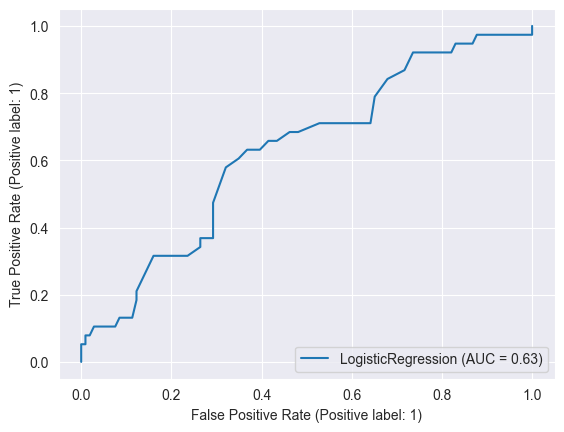

In [35]:
# Для идеального классификатора график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев
# составляет 100% или 1,0 (идеальная чувствительность), а доля ложно положительных примеров равна нулю.
# Поэтому чем ближе кривая к верхнему левому углу, тем выше предсказательная способность модели.
# Наоборот, чем меньше изгиб кривой и чем ближе она расположена к диагональной прямой, тем менее эффективна модель.
# Диагональная линия соответствует «бесполезному» классификатору, т.е. полной неразличимости двух классов.
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [143]:
# AUC = 0.67, вероятность разделить классы составляет 67%, модель работает средне
# 0.8 <= AUC <= 1.0 — модель работает превосходно;
# 0.6 <= AUC < 0.8 — модель работает хорошо;
# 0.5 <= AUC < 0.6  — модель работает удовлетворительно;
# AUC < 0.5 — модель не работает.

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


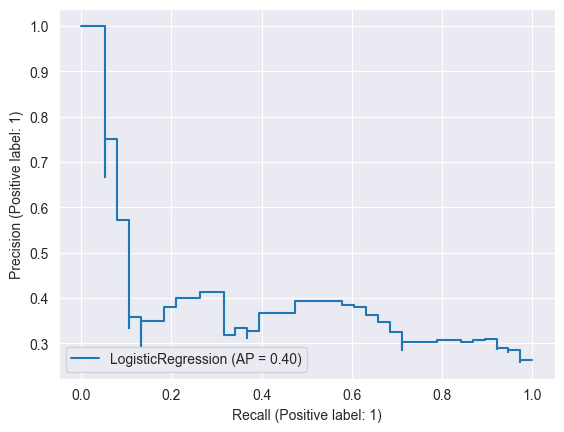

In [36]:
# Precision (точность) можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.
# Recall (полнота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
# Очень толковая статья и картинка, которая лучше объясняет первые два предложения: https://habr.com/ru/company/ods/blog/328372/
# Чем больше площадь под кривой, тем точнее модель
# Чем ближе значение AP к единице, тем выше точность
plot_precision_recall_curve(clf, X_test, y_test)
plt.show()

In [37]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [38]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.55713
AUC = 0.62848
Average Precision = 0.39784

Using 0.5 as threshold:
Accuracy = 0.74306
Precision = 0.66667
Recall = 0.05263
F1 score = 0.09756

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       106
           1       0.67      0.05      0.10        38

    accuracy                           0.74       144
   macro avg       0.71      0.52      0.47       144
weighted avg       0.72      0.74      0.65       144



Confusion Matrix


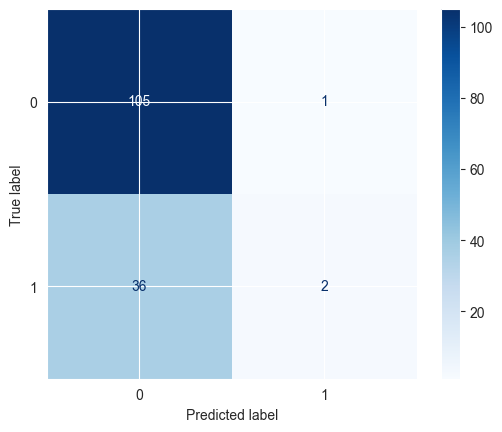

In [39]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [40]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + ['Sex'], 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.995175
1,Sex,-0.486742


In [41]:
# Интерпретация результатов
# Точность модели оставляет желать лучшего, recall для положительных исходов всего 0.05%
# Также можно сказать, что возраст не сильно повышает шансы на выживаемость.

#### Один номинативный и один количественный предиктор

### Постановка задачи
Спрогнозировать шансы выживания на Титанике в зависимости от пола и возраста пассажира

In [542]:
# Задача: Спрогнозировать шансы выживания на Титанике в зависимости от пола и возраста пассажира
# 1. Подтвердим статистические предположения
# 2. Построим модель логистической регрессии, которая лучше всего описывает поведение зависимой переменной. Найдем значения b0 (intercept) и b1(slope),
# чтобы воспользоваться формулой: log(odds) = b0 + b1 * X для предсказания шансов выжить.
# 3. Обучим модель предсказывать шансы
# 4. Проверим точность предсказания
# 5. Предскажем шансы

In [543]:
# Подтвердим верность статистических предположений:
# 1. Зависимая переменная — это бинарная переменная
# 2. Наблюдения независимы между собой
# 3. Отсутствует мультиколлинеарность
# 4. Отсутствуют выбросы
# 5. Размер выборок достаточно большой
# 6. Есть линейная зависимость между независимой переменной (ыми) и логитом вероятности

# Шаг подробно разобрали в примере с одним номинативным предиктором

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep = '\t', usecols=['Survived', 'Age', 'Sex'])
df = df[df.Age.notnull()]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1306
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1046 non-null   int64  
 1   Sex       1046 non-null   object 
 2   Age       1046 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 32.7+ KB


In [45]:
# Преобразуем номинативную переменную в две бинарных колонки, первую удалим
df_dummy = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [46]:
numeric_cols = ['Age']
cat_cols = list(set(df_dummy.columns) - set(numeric_cols) - {'Survived'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Age']
['Sex_male']


In [47]:
# Проверим модель, чтобы убедиться в точности предсказания исхода. Разделим первоначальный набор данных на два: обучающий и тестовый.
# Для этого мы можем использовать метод train_test_split со следующими характеристиками:
# test_size = 0,90: сохранить 90% исходного набора данных в качестве тестового набора данных
# stratify = df[‘Survived’]: когда набор данных несбалансирован, рекомендуется проводить стратифицированную выборку.
# Таким образом, наборы данных для обучения и тестирования будут иметь те же части целевых классов, что и полный набор данных.

# Для проверки равномерности распределения исходов выведем на печать результаты.

In [48]:
random_seed = 888
df_train, df_test = train_test_split(df_dummy, test_size=0.90, random_state=random_seed, stratify=df_dummy['Survived'])

print(df_dummy.shape)
print(df_train.shape)
print(df_test.shape)
print()
print(df_dummy['Survived'].value_counts(normalize=True))
print()
print(df_train['Survived'].value_counts(normalize=True))
print()
print(df_test['Survived'].value_counts(normalize=True))

(1046, 3)
(104, 3)
(942, 3)

0    0.601338
1    0.398662
Name: Survived, dtype: float64

0    0.605769
1    0.394231
Name: Survived, dtype: float64

0    0.600849
1    0.399151
Name: Survived, dtype: float64


In [49]:
# Преобразуем возраст в скалярную величину
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])
df['Age_scaler'] = scaler.transform(df[numeric_cols])

In [50]:
# Реализуем функцию, которая будет возвращать данные переменных X и y
# Функция пригодится для тестового набора данных
def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Survived']
    return X, y

X, y = get_features_and_target_arrays(df_dummy, numeric_cols, cat_cols, scaler)

In [54]:
df.head(5)

,Survived,Sex,Age,Age_scaler
0,0,male,22.0,-0.509248
1,1,female,38.0,0.586873
2,1,female,26.0,-0.235218
3,1,female,35.0,0.381350
4,0,male,35.0,0.381350


In [55]:
X[0:3]

array([[ 1.        , -0.50924825],
       [ 0.        ,  0.58687257],
       [ 0.        , -0.23521804]])

In [56]:
y[:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [57]:
clf = LogisticRegression(penalty='none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [58]:
clf.intercept_

array([1.62035743])

In [59]:
clf.coef_

array([[-3.42199369, -0.03965837]])

In [60]:
# Проверим, что модель работает корректно, сверим intercept и коэффициенты
lm_binomial = smf.glm(formula='Survived ~ Sex + Age_scaler', data=df, family=sm.families.Binomial())
result = lm_binomial.fit()
result.params

Intercept      1.620357
Sex[T.male]   -3.421992
Age_scaler    -0.039658
dtype: float64

In [62]:
# Получим значения X и Y для тестового набора данных
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


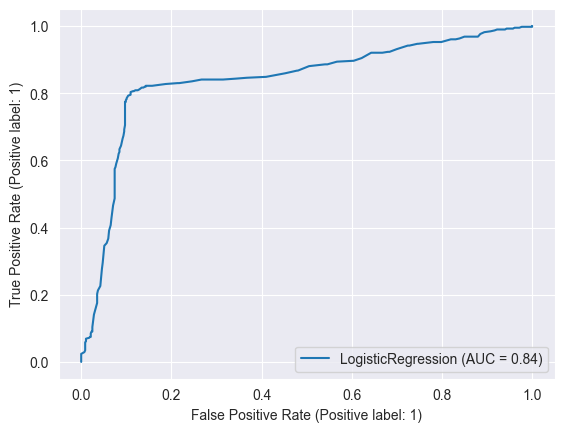

In [63]:
# Для идеального классификатора график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев
# составляет 100% или 1,0 (идеальная чувствительность), а доля ложно положительных примеров равна нулю.
# Поэтому чем ближе кривая к верхнему левому углу, тем выше предсказательная способность модели.
# Наоборот, чем меньше изгиб кривой и чем ближе она расположена к диагональной прямой, тем менее эффективна модель.
# Диагональная линия соответствует «бесполезному» классификатору, т.е. полной неразличимости двух классов.
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [75]:
# AUC = 0.84, вероятность разделить классы составляет 84%, модель работает отлично
# 0.8 <= AUC <= 1.0 — модель работает превосходно;
# 0.6 <= AUC < 0.8 — модель работает хорошо;
# 0.5 <= AUC < 0.6  — модель работает удовлетворительно;
# AUC < 0.5 — модель не работает.

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


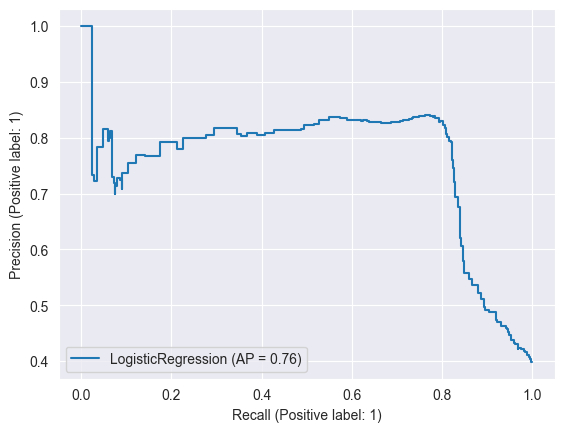

In [65]:
# Precision (точность) можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.
# Recall (полнота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
# Очень толковая статья и картинка, которая лучше объясняет первые два предложения: https://habr.com/ru/company/ods/blog/328372/
# Чем больше площадь под кривой, тем точнее модель
# Чем ближе значение AP к единице, тем выше точность
plot_precision_recall_curve(clf, X_test, y_test)
plt.show()

In [66]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [67]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.42017
AUC = 0.83922
Average Precision = 0.75832

Using 0.5 as threshold:
Accuracy = 0.85138
Precision = 0.84104
Recall = 0.77394
F1 score = 0.80609

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       566
           1       0.84      0.77      0.81       376

    accuracy                           0.85       942
   macro avg       0.85      0.84      0.84       942
weighted avg       0.85      0.85      0.85       942



Confusion Matrix


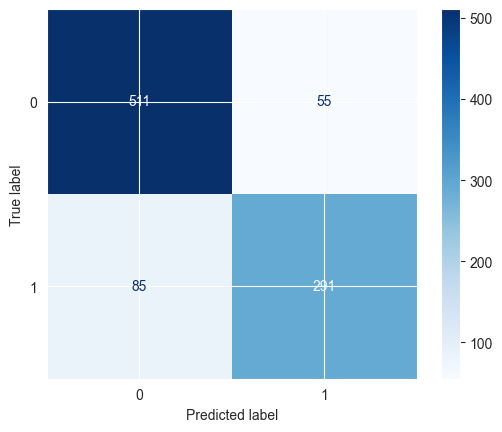

In [68]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [73]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,1.620357
1,Sex_male,-3.421994
2,Age,-0.039658


In [74]:
# Интерпретация результатов
# Модель предсказывает результат с высокой точностью
# Шансы выжить значительно зависят от пола и незначительно от возраста

### Множественная линейная регрессия (Linear regression)
Линейная регрессия — используемая в статистике регрессионная модель зависимости одной переменной от другой. Позволяет предсказывать
значение зависимой переменной на основе значения независимой (predictor).

Множественная регрессия позволяет исследовать влияние сразу нескольких независимых переменных на одну зависиммую.

Модель создается по методу наименьших квадратов (OLS — ordinary least squares)
МНК (метод наименьших квадратов) - это способ нахождения оптимальных параметров линейной регрессии (b0, b1), таким образом, чтобы сумма
квадратов ошибок (остатков) была минимальная.
Остаток — это разница между значением реальной точки на графике и значением, которое предсказывает регрессионная прямая.
b0 - (intercept) значение точки пересечения линии с осью Y
b1 - (slope) задаёт наклон и направление линии регрессии

**Требования к данным**
- зависимая переменная — это количественная непрерывная переменная
- независимые наблюдения в каждой из выборок
- нормальное распределение переменных (желательно)
- линейная взаимосвязь между переменными
- нормальное распределение остатков
- гомоскедастичность остатков — постоянная переменчивость остатков на всех уровнях зависимой переменной
- отсутствие мультиколлинеарности (наличие сильной корреляции между независимыми переменными)


### Постановка задачи
Спрогнозировать уровень бедности на основе данных об уровне образования и доле белого населения

In [180]:
# Задача: Спрогнозировать уровень бедности на основе данных об уровне образования и доле белого населения.
# Построим модель линейной регрессии, которая лучше всего описывает поведение зависимой переменной.

# Подтвердим статистические предположения
# 1. Зависимая переменная — это количественная непрерывная переменная
# 2. Независимые наблюдения в каждой из выборок
# 3. Нормальное распределение переменных (желательно)
# 4. Линейная взаимосвязь между переменными
# 5. Нормальное распределение остатков
# 6. Гомоскедастичность остатков — постоянная переменчивость остатков на всех уровнях зависимой переменной
# 7. Отсутствие мультиколлинеарности (наличие сильной корреляции между независимыми переменными)


In [545]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [546]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [547]:
# Независимая переменная №1
x_white = df['white']
# Независимая переменная №2
x_hs_grad = df['hs_grad']
# Зависимая переменная
y = df['poverty']

In [548]:
print(f'y (min, max): {y.min()} - {y.max()}')

y (min, max): 5.6 - 18.0


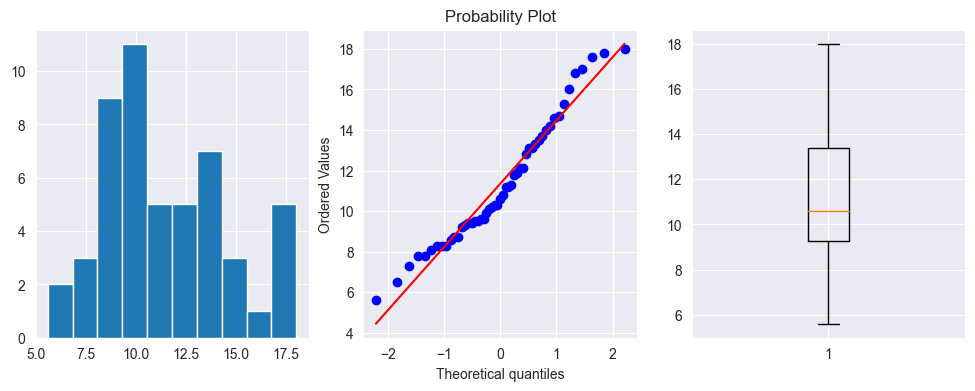

In [549]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.hist(y, 10)
stats.probplot(y, dist="norm", plot=ax2)
ax3.boxplot(y)
plt.show()

In [550]:
print(f'x_white (min, max): {x_white.min()} - {x_white.max()}')

x_white (min, max): 25.9 - 97.1


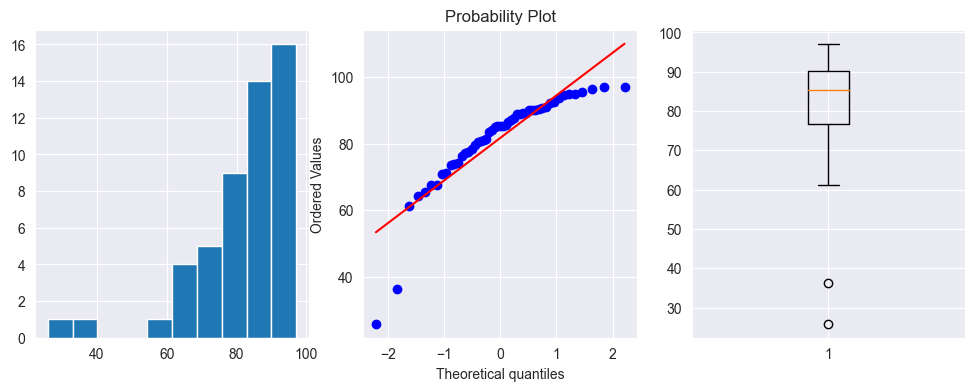

In [551]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.hist(x_white, 10)
stats.probplot(x_white, dist="norm", plot=ax2)
ax3.boxplot(x_white)
plt.show()

In [552]:
print(f'x_hs_grad (min, max): {x_hs_grad.min()} - {x_hs_grad.max()}')

x_hs_grad (min, max): 77.2 - 92.1


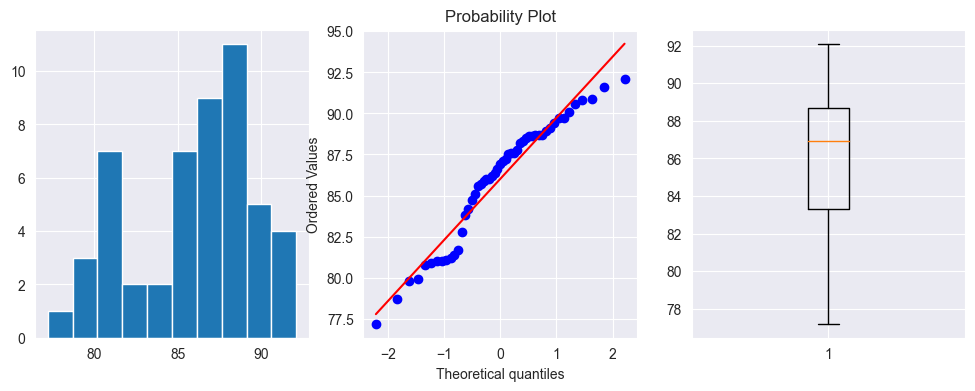

In [553]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.hist(x_hs_grad, 10)
stats.probplot(x_hs_grad, dist="norm", plot=ax2)
ax3.boxplot(x_hs_grad)
plt.show()

In [554]:
# 1. Зависимая переменная — это количественная непрерывная переменная
# Зависимая переменная нормально распределена на интервале 25.9 - 97.1
# 2. Независимые наблюдения в каждой из выборок
# Наблюдения это показатель по одному из регионов, крайне маловероятно, что показатели одного региона влияют на другой.
# 3. Нормальное распределение переменных (желательно)
# Зависимая переменная отвечает требованию, независимые нет.

In [555]:
# 4. Линейная взаимосвязь между переменными
result = stats.pearsonr(x_white, y)
print('pearson', result[0])
print('p_value', result[1])

pearson -0.3085200686353027
p_value 0.027616394900656753


In [556]:
# Есть незначительная (-0.3) статистически значимая (P-value < 0.05) корреляция между переменными

In [557]:
result = stats.pearsonr(x_hs_grad, y)
print('pearson', result[0])
print('p_value', result[1])

pearson -0.7468582531582508
p_value 3.1088298103183373e-10


In [558]:
# Есть значительная (-0.74) статистически значимая (P-value < 0.05) корреляция между переменными

In [559]:
# Найдем остатки
# Синтаксис ols(формула, data=источник данных)
lm = smf.ols(formula='poverty ~ hs_grad + white', data=df)
result = lm.fit()
result.params

Intercept    64.945215
hs_grad      -0.593780
white        -0.030888
dtype: float64

In [560]:
# Добавим в таблицу предсказанные значения зависимой переменной
model_fitted_y = result.fittedvalues
df['fitted_poverty'] = model_fitted_y
df.head(10)

,state,metro_res,white,hs_grad,poverty,female_house,fitted_poverty
0,Alabama,55.4,71.3,79.9,14.6,14.2,15.299903
1,Alaska,65.6,70.8,90.6,8.3,10.8,8.961905
2,Arizona,88.2,87.7,83.8,13.3,11.1,12.477597
3,Arkansas,52.5,81.0,80.9,18.0,12.1,14.406508
4,California,94.4,77.5,81.1,12.8,12.6,14.395861
5,Colorado,84.5,90.2,88.7,9.4,9.6,9.490857
6,Connecticut,87.7,85.4,87.5,7.8,12.1,10.351655
7,Delaware,80.1,76.3,88.7,8.1,13.1,9.920202
8,District of Columbia,100.0,36.2,86.0,16.8,18.9,12.762021
9,Florida,89.3,80.6,84.7,12.1,12.0,12.162501


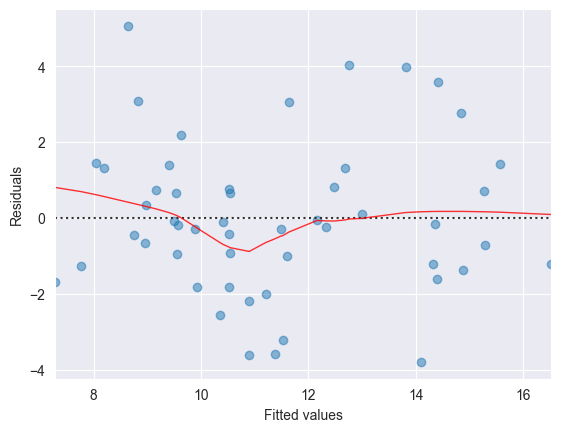

In [561]:
# Проверим гомоскедастичность остатков с помощью Residuals vs Fitted Plot
plot = sns.residplot(x=model_fitted_y, y='poverty', data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')
plt.show()

In [562]:
# Мы видим, что распределение остатков близко к равномерному распределению.

In [563]:
# Проверим остатки на нормальность распределения
df['Residuals'] = df['poverty'] - df['fitted_poverty']
df.head(10)

,state,metro_res,white,hs_grad,poverty,female_house,fitted_poverty,Residuals
0,Alabama,55.4,71.3,79.9,14.6,14.2,15.299903,-0.699903
1,Alaska,65.6,70.8,90.6,8.3,10.8,8.961905,-0.661905
2,Arizona,88.2,87.7,83.8,13.3,11.1,12.477597,0.822403
3,Arkansas,52.5,81.0,80.9,18.0,12.1,14.406508,3.593492
4,California,94.4,77.5,81.1,12.8,12.6,14.395861,-1.595861
5,Colorado,84.5,90.2,88.7,9.4,9.6,9.490857,-0.090857
6,Connecticut,87.7,85.4,87.5,7.8,12.1,10.351655,-2.551655
7,Delaware,80.1,76.3,88.7,8.1,13.1,9.920202,-1.820202
8,District of Columbia,100.0,36.2,86.0,16.8,18.9,12.762021,4.037979
9,Florida,89.3,80.6,84.7,12.1,12.0,12.162501,-0.062501


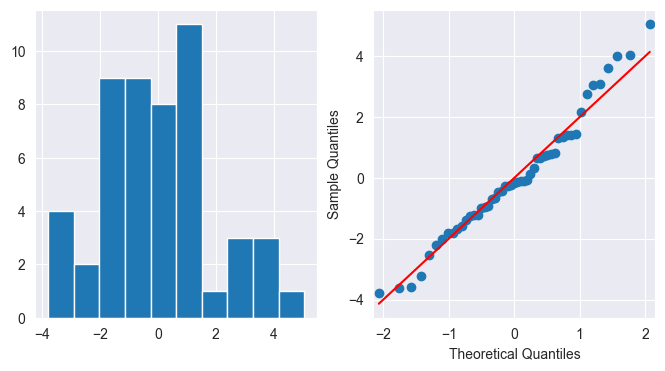

In [564]:
# Построим гистрограмму распределения остатков и QQ Plot для проверки распределения на нормальность
# Histogram of residuals and Normal Q-Q Plot of residuals
figure, axes = plt.subplots(1, 2, figsize=(8,4))
df['Residuals'].hist(ax=axes[0], bins=10)
sm.qqplot(df['Residuals'], line='s', ax=axes[1])
plt.show()

In [565]:
# 5. Нормальное распределение остатков
# Считаем, что это верное утверждение
# 6. Гомоскедастичность остатков — постоянная переменчивость остатков на всех уровнях зависимой переменной
# Распределение остатков близко к равномерному

In [566]:
df_clear = df.drop(columns=['state', 'metro_res', 'female_house', 'fitted_poverty', 'Residuals'])
df_clear.head()

,white,hs_grad,poverty
0,71.3,79.9,14.6
1,70.8,90.6,8.3
2,87.7,83.8,13.3
3,81.0,80.9,18.0
4,77.5,81.1,12.8


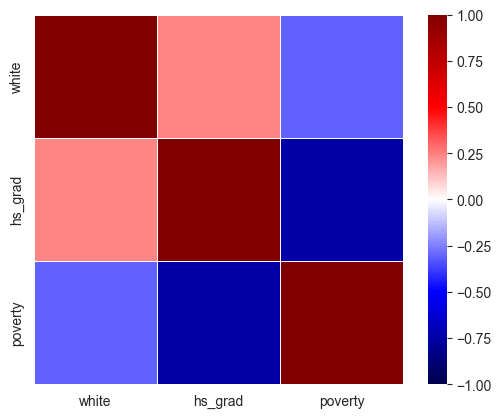

In [567]:
# 7. Отсутствие мультиколлинеарности (наличие сильной корреляции между независимыми переменными)
# Построим график взаимной корреляции переменных
sns.heatmap(df_clear.corr(), vmax=1, vmin=-1, center=0, cmap='seismic',  square=True, linewidths=.5, annot=False, fmt=".2f")
plt.show()

In [568]:
corr = df_clear.corr()
corr

,white,hs_grad,poverty
white,1.000000,0.238156,-0.308520
hs_grad,0.238156,1.000000,-0.746858
poverty,-0.308520,-0.746858,1.000000


In [569]:
# Получим сводную информацию описательной статистики
df_describe = df.describe().transpose()
df_describe

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,7.224902e+01,15.275894,38.200000,60.800000,71.600000,86.800000,100.000000
white,51.0,8.171961e+01,13.897223,25.900000,76.800000,85.400000,90.250000,97.100000
hs_grad,51.0,8.601176e+01,3.725998,77.200000,83.300000,86.900000,88.700000,92.100000
poverty,51.0,1.134902e+01,3.099185,5.600000,9.250000,10.600000,13.400000,18.000000
female_house,51.0,1.163333e+01,2.356155,7.800000,9.550000,11.800000,12.650000,18.900000
fitted_poverty,51.0,1.134902e+01,2.351898,7.283589,9.543712,10.896705,12.876544,16.523184
Residuals,51.0,-2.567010e-14,2.018297,-3.793848,-1.246040,-0.178034,1.068585,5.062056


In [570]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     32.59
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.15e-09
Time:                        16:44:22   Log-Likelihood:                -107.68
No. Observations:                  51   AIC:                             221.4
Df Residuals:                      48   BIC:                             227.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9452      6.732      9.647      0.000      51.410      78.481
hs_grad       -0.5938      0.081     -7.376      0.000      -0.756      -0.432
white         -0.0309      0.022     -1.431      0.159      -0.074       0.013
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.346
Skew:                           0.397   Prob(JB):                        0.510
Kurtosis:                       2.950   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Двухфакторный дисперсионный анализ (Two-Way ANOVA)
**Используем для анализа 3-х и более выборок**

Переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется независимой переменной. Количественная переменная, по степени выраженности которой мы сравниваем группы, называется зависимая переменная.

**Краткое описание метода**
Метод основан на сравнении дисперсии между выборками с дисперсией внутри выборок. Если изменчивость между выборками значительно превышает изменчивость внутри выборок можно сделать вывод, что есть статистически значимые различия между группами.

1. Находим среднее для каждой выборки
2. Считаем SSW — сумму квадратов внутри групп (sum of square within groups)
3. Считаем SSB — сумму квадратов между группами (sum of square between groups)
4. Находим MS — средний квадрат (mean square), отношение суммы квадратов к числу их степеней свободы внутри групп и между группами
5. Находим критерий Фишера — отношение MSbeetwen к MSwithin
6. Сравниваем полученное значение с критическим значением

Интересное наблюдение
- Если основной вклад в SST делает SSB, то мы можем сделать вывод, что значимые различия наблюдаются между группами
- Если основной вклад в SST делает SSW, то мы можем сделать вывод, что значимы различия внутри групп

**Интерпретация результатов теста**
В результате теста мы получаем:
- значение F-критерия
- P-value

Если значение F-критерия превышает критическое значение, мы можем сделать вывод того, что нашли статистически значимое различие между группами.
Величина F-критерия показывает как сильно группы различаются между друг другом.
P-value — вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет (верная H0)


**Требования к данным**
- Зависимая переменная — это количественная непрерывная переменная, дискретные данные менее желательны
- Независимые между собой выборки
- Независимые наблюдения в каждой из выборок
- Нормальность распределения
- Отсутствие выбросов (дисперсионный анализ очень чувствителен к выбросам)
- Гомогенность (однородностью) дисперсии.

Если есть выбросы и данные распределяются ненормально, то лучше использовать непараметрическими способами анализа. Например, H-критерием Краскела-Уоллеса.
Обратить внимание, возможно один фактор может значительно влиять на другой фактор.

<a href="https://pozdniakov.github.io/tidy_stats/anova.html">доп. материал про ANOVA</a>

### Постановка задачи
Найти влияние дозировки и возраста пациента на уровень экспрессии гена

In [215]:
# Задача: Найти влияние дозировки и возраста пациента на уровень экспрессии гена
# Задачу можно переформулировать так:
# 1. Есть ли параметр, который влияет на результат?
# 2. Есть ли статистически значимые различия между 4 группами?
# У нас есть результаты 4 тестов Young-Low_dosis, Young-High_dosis, Old-Low_dosis, Old-High_dosis (см. ссылку на данные ниже)
# Наша нулевая гипотеза (Н-ноль) состоит в том, что результаты между группами не являются статистически значимыми.
# Чтобы H0 была верной, F должно быть очень маленьким (близким к 0) и P-value > 0.05.

# Статистически значимый результат теста (P ≤ 0,05) означает, что нулевая гипотеза не верна и должна быть отклонена
# Чтобы результаты были статистически значимыми, F должен быть не слишком мал, определенно не близок к 0 и P < 0,05.

# Подтверждение статистических допущений
# 1. Зависимая переменная — это количественная непрерывная переменная, дискретные данные менее желательны
# 2. Независимые между собой выборки
# 3. Независимые наблюдения в каждой из выборок
# 4. Нормальность распределения
# 5. Отсутствие выбросов (дисперсионный анализ очень чувствителен к выбросам)
# 6. Гомогенность (однородностью) дисперсии.

# Подробно разобрали на шаге с однофакторный дисперсионным анализом, пропустим тут

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [233]:
url = 'https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/atherosclerosis.csv'
df = pd.read_csv(url, sep=',')
df.head(3)

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   expr    64 non-null     float64
 1   age     64 non-null     int64  
 2   dose    64 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [235]:
# Подготовим данные к анализу
df.age = df.age.map({1: 'Young', 2: 'Old'})
df.dose = df.dose.map({'D1': 'Low', 'D2': 'High'})

In [237]:
df.age.value_counts()

Young    32
Old      32
Name: age, dtype: int64

In [238]:
df.dose.value_counts()

Low     32
High    32
Name: dose, dtype: int64

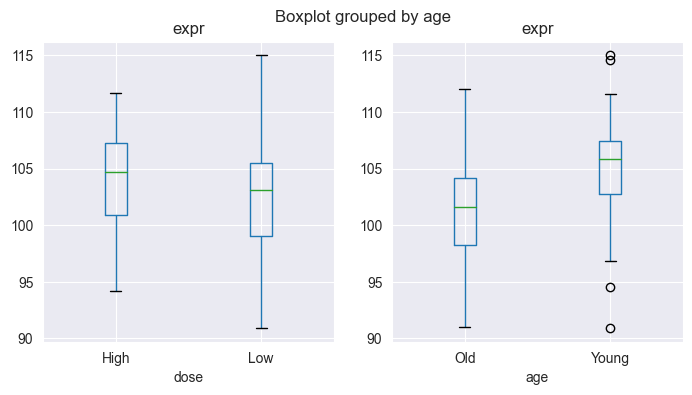

In [241]:
# Убедимся, что нет выбросов
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
df.boxplot('expr', by='dose', grid=True, ax=ax1)
df.boxplot('expr', by='age', grid=True, ax=ax2)
plt.show()

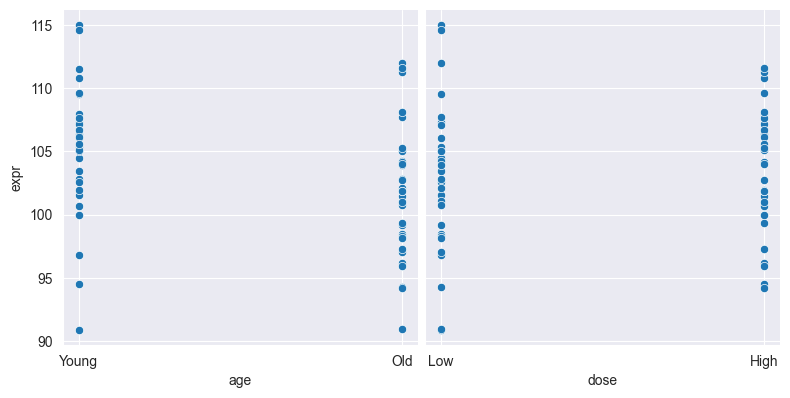

In [251]:
sns.pairplot(df, y_vars="expr", x_vars=['age', 'dose'], height=4)
plt.show()

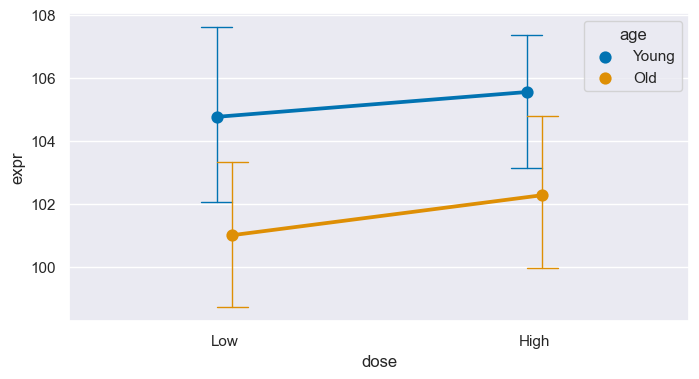

In [252]:
# Сравним средние значения, дисперсию и зависимость экспрессии от возраста и дозы
sns.set()
sns.pointplot(data=df, x='dose', y='expr', hue='age', dodge=True, capsize=.1, errwidth=1, palette='colorblind')
plt.show()

In [253]:
# Проведем однофакторный ANOVA.
# H0: среднее значение одинаковое у всех групп
G1_A1_D1 = df[(df['age'] == 'Young') & (df['dose'] == 'Low')]
G2_A1_D2 = df[(df['age'] == 'Young') & (df['dose'] == 'High')]
G3_A2_D1 = df[(df['age'] == 'Old') & (df['dose'] == 'Low')]
G4_A2_D2 = df[(df['age'] == 'Old') & (df['dose'] == 'High')]

In [254]:
# Найдем критичное значение F-value
# Рассчитаем степени свободы между группами
df_between = 4 - 1
# Рассчитаем степени свободы внутри групп
df_within = len(df) - 4
# Уровень статистической значимости 0.05
sign_level = 1 - .05

In [255]:
f_critical_value = stats.f.ppf(q=sign_level, dfn=df_between, dfd=df_within)
f_critical_value

2.7580782958425805

In [258]:
Age1_D1 = df[(df['age'] == 'Young') & (df['dose'] == 'Low')]["expr"]
Age1_D2 = df[(df['age'] == 'Young') & (df['dose'] == 'High')]["expr"]
Age2_D1 = df[(df['age'] == 'Old') & (df['dose'] == 'Low')]["expr"]
Age2_D2 = df[(df['age'] == 'Old') & (df['dose'] == 'High')]["expr"]

In [259]:
f_statistics_age_dose, p_value_age_dose = stats.f_oneway(Age1_D1, Age1_D2, Age2_D1, Age2_D2)
print("Results for all 4 groups", stats.f_oneway(Age1_D1, Age1_D2, Age2_D1, Age2_D2))

Results for all 4 groups F_onewayResult(statistic=2.707638006827807, pvalue=0.05309710567334635)


In [261]:
# Сравним критическое значение F-value и фактическое значение F-value
# Если фактическое значение F-value больше критического значения F-value (2,7580782958425805) и значение P-value <= 0.05,
# то результаты теста статистически значимы, что подтверждает альтернативную гипотезу.
# P-value > 0,05 и  F-value выше 2,7 говорит нам, что при сравнении 4 групп стат. значимые различия отсутствуют
if round(p_value_age_dose, 2) > 0.05:
    print('Мы не обнаружили существенных статистических различий')
else:
    if round(f_statistics_age_dose, 3) >= round(f_critical_value, 3):
        print('Мы обнаружили существенных статистических различий')
    else:
        print('Нам нужно рассмотреть каждую группу отдельно')

Нам нужно рассмотреть каждую группу отдельно


In [262]:
age_young = df[df['age'] == 'Young']["expr"]
dose_low = df[df['dose'] == 'Low']["expr"]
f_statistics_young_low, p_value_young_low = stats.f_oneway(age_young, dose_low)
print('f_statistics_young_low:', f_statistics_young_low, 'p_value_young_low:', p_value_young_low)

f_statistics_young_low: 2.7975396104391184 p_value_young_low: 0.09944849951092954


In [263]:
age_old = df[df['age'] == 'Old']["expr"]
f_statistics_old_low, p_value_old_low = stats.f_oneway(age_old, dose_low)
print('f_statistics_old_low:', f_statistics_old_low, 'p_value_old_low:', p_value_old_low)

f_statistics_old_low: 0.8403405909846235 p_value_old_low: 0.36285146466060336


In [264]:
dose_high = df[df['dose'] == 'High']["expr"]
f_statistics_young_high, p_value_young_high = stats.f_oneway(age_young, dose_high)
print('f_statistics_young_high:', f_statistics_young_high, 'p_value_young_high:', p_value_young_high)

f_statistics_young_high: 0.9724991138629211 p_value_young_high: 0.3278906294824979


In [265]:
f_statistics_old_high, p_value_old_high = stats.f_oneway(age_old, dose_high)
print('f_statistics_old_high:', f_statistics_old_high, 'p_value_old_high:', p_value_old_high)

f_statistics_old_high: 3.2601127057104002 p_value_old_high: 0.0758394699711344


In [266]:
# Здесь мы видим самые интересные результаты
# P < 0,05 и F-value > 2.7, это означает, что группы, разделенные по возрасту, дают стат. значимые результаты
f_statistics_age, p_value_age = stats.f_oneway(age_young, age_old)
print('f_statistics_age:', f_statistics_age, 'p_value_age:', p_value_age)

f_statistics_age: 7.612770077046976 p_value_age: 0.007608712054113225


In [267]:
f_statistics_dose, p_value_dose = stats.f_oneway(dose_low, dose_high)
print('f_statistics_dose:', f_statistics_dose, 'p_value_dose:', p_value_dose)

f_statistics_dose: 0.5862334097242099 p_value_dose: 0.44678441580203143


In [ ]:
# sum_sq в age и dose это SSB (total sum of squares between groups)
# mean_sq в age и dose это SSB деленное на кол-во степеней свободы
# df в age и dose это степени свободы между группами
# sum_sq в Residual это SSW (total sum of squares within groups)
# mean_sq в Residual это SSW деленное на кол-во степеней свободы
# df в Residual это степени свободы внутри группам

In [269]:
expr_lm = ols('expr ~ age+dose', data=df).fit()
table_1 = sm.stats.anova_lm(expr_lm, type=1)
table_1

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,197.452754,197.452754,7.569592,0.007804
dose,1.0,16.912241,16.912241,0.648351,0.423830
Residual,61.0,1591.184501,26.084992,NaN,NaN


In [270]:
expr_lm = ols('expr ~ age*dose', data=df).fit()
table_2 = sm.stats.anova_lm(expr_lm, type=2)
table_2

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,197.452754,197.452754,7.449841,0.008313
dose,1.0,16.912241,16.912241,0.638094,0.427552
age:dose,1.0,0.927077,0.927077,0.034978,0.852272
Residual,60.0,1590.257424,26.504290,NaN,NaN


In [272]:
# Интерпретация результатов
# Значительное статистически значимое влияние на экспрессию гена оказывает возраст пациента
# Дозировка не оказывает влияния
# Нет взаимодействия между факторами